# **Trabajo Práctico - Aprendizaje Automático**
# *Integrante: Lucas Demarré*
# *Año: 2023*


---

# **Tabla de contenidos**

1.   [**Introducción**](#)
2.   [**Librerías a utilizar**](#)
3.   [**Carga del Dataset**](#)
4.   [**Funciones y clases a utilizar más adelante**](#)
    1.   [*Funciones*](#)   
    2.   [*Clases*](#)
5.   [**Exploración de los datos**](#)
    1.   [*Filtración de los datos de interés*](#)
    2.   [*Verificar la existencia de datos faltantes*](#)
    3.   [*Separar las características según su tipo*](#)
        1.   [**Variables numéricas**](#)
        2.   [**Variables categóricas**](#)
    4.   [*Verificar valores atípicos*](#)
    5.   [*Verificar escalado de los datos*](#)
    6.   [*Verificar balanceo de la variable binaria objetivo*](#)
6.   [**Separación en datos de entrenamiento, test y validación**](#)
7.   [**Preprocesamiento de los datos**](#)
    1.   [*Imputación de datos faltantes*](#)
    2.   [*Solución de outliers (valores atípicos)*](#)
    2.   [*Selección de características*](#)
    3.   [*Visualización de las características*](#)
        1.    [**Histograma de 'WindSpeed', 'Humidity', 'Pressure' y 'Temp'**](#)
        2.    [**Cantidad de lluvia promedio por ciudad**](#)
        3.    [**Proporción de días lluviosos por ciudad**](#)
        4.    [**Relación entre 'Sunshine' y 'Rainfall'**](#)
        5.    [**Velocidad promedio del viento en cada ciudad**](#)
        6.    [**Humedad promedio en cada ciudad**](#)
        7.    [**Presión Atmosférica promedio en cada ciudad**](#)
        8.    [**Promedio de cada temperatura por ciudad**](#)
    4.   [*Estandarización de los datos*](#)
    5.   [*Codificación de variables categóricas*](#)
    6.   [*Balanceamos la variable binaria objetivo*](#)
8.   [**División de los Dataset (train, test y val) en X e Y para cada modelo**](#)
9.   [**Métodos de Gradientes Descendientes**](#)
    1.    [*Gradiente Descendiente*](#)
    2.    [*Gradiente Descendiente Estocástico*](#)
    3.    [*Gradiente Descendiente Mini-Batch*](#)
10.   [**Modelos Base**](#)
    1.   [*Regresión*](#)
    2.   [*Clasificación*](#)
11.   [**Entrenamiento de modelos con Optimización de Hiperparámetros y Validación Cruzada**](#)
    1.   [*Regresión*](#)
        1.   [**Regresión Lineal Múltiple con Regularizadores (Lasso, Ridge y Elasticnet)**](#)
        2.   [**Redes Neuronales para Regresión**](#)
            1.    [*Buscamos el mejor modelo*](#)    
            2.    [*Buscamos el mejor LR para el mejor modelo*](#)
    2.   [*Clasificación*](#)
        1.   [**Regresión Logística con Regularizadores (Lasso, Ridge y Elasticnet)**](#)
        2.   [**Redes Neuronales para Clasificación**](#)
            1.    [*Buscamos el mejor modelo*](#)    
            2.    [*Buscamos el mejor LR para el mejor modelo*](#)
12.   [**Evaluación final de los modelos, gráficas y explicabilidad**](#)
    1.   [*Regresión*](#)
        1.   [**Regresión Lineal Múltiple con Regularizadores (Lasso, Ridge y Elasticnet)**](#)
            1.    [*Evaluación Final*](#)
            2.    [*Interpretabilidad Local*](#)
            3.    [*Interpretabiliad Global*](#)
        2.   [**Redes Neuronales para Regresión**](#)
    2.   [*Clasificación*](#)
        1.   [**Regresión Logística con Regularizadores (Lasso, Ridge y Elasticnet)**](#)
            1.    [*Evaluación Final*](#)
            2.    [*Interpretabilidad Local*](#)
            3.    [*Interpretabiliad Global*](#)
        2.   [**Redes Neuronales para Clasificación**](#)
13.   [**Elección del modelo para cada problema**](#)
14.   [**Pipelines**](#)    
    1.   [*Creación de los pipelines*](#)   
    2.   [*Guardar los pipelines en archivos para la puesta en producción*](#)
15.   [**Conclusiones**](#)

# **1. Introducción**

---



En este trabajo práctico, nos proponemos predecir si mañana va a llover y la cantidad de milímetros de lluvia para ese mismo día utilizando un conjunto de datos llamado **'weatherAUS.csv'** en las ciudades de **Sydney**, **SydneyAirport**, **Canberra**, **Melbourne** y **MelbourneAirport** *(costa sureste)*. Este conjunto de datos *(Dataset)* proporciona información sobre las condiciones climáticas de cada día a lo largo de la última década en **Australia**, incluyendo dos variables que representan las predicciones sobre si lloverá y la cantidad de lluvia en milímetros. Estas predicciones son proporcionadas por la entidad que recopila los datos climáticos diarios.

Nuestra tarea consiste en utilizar las variables necesarias dentro de todas las variables disponibles *(pueden ser todas o la gran mayoría)*, excluyendo las relacionadas con las predicciones de lluvia, con el fin de generar nuestras propias predicciones. Las variables predichas previamente se mantendrán como método de verificación para evaluar la precisión de nuestras predicciones. La razón para no utilizar las variables predichas en nuestro modelo radica en la lógica de que no se puede predecir algo que ya se conoce. Si ya sabemos que va a llover mañana, no tiene sentido predecirlo nuevamente. Además, la imposibilidad de conocer el futuro impide que utilicemos información del día siguiente en nuestras predicciones.

A continuación, se presentan las características *(columnas)* del Dataset, lo que nos permitirá comprender mejor cada una de las variables explicativas que utilizaremos.

Medidas a tener en consideración:

*   **Oktas**: son unidades de octavos. Registra cuántos octavos del
cielo están oscurecidos por nubes. Una medida de 0 indica cielo completamente despejado, mientras que un 8 indica que está completamente nublado.
*   **Booleano**: es una unidad lógica donde el 1 (generalmente) representa la presencia de *algo* y 0 la ausencia de eso mismo. Esto puede ser al revés si así se lo desea.

<table style="font-family: Arial, sans-serif; font-size: 16px;">
  <tr>
    <th><b>Columnas</b></th>
    <th><b>Descripción</b></th>
  </tr>
  <tr>
    <td><b>Date</b></td>
    <td>El día de observación de los datos climáticos.</td>
  </tr>
  <tr>
    <td><b>Location</b></td>
    <td>El nombre del lugar de observación de los datos climáticos.</td>
  </tr>
  <tr>
    <td><b>MinTemp</b></td>
    <td>La temperatura mínima medida en grados celsius.</td>
  </tr>
  <tr>
    <td><b>MaxTemp</b></td>
    <td>La temperatura máxima medida en grados celsius.</td>
  </tr>
  <tr>
    <td><b>Rainfall</b></td>
    <td>La cantidad de lluvia registrada durante el día medida en milímetros.</td>
  </tr>
  <tr>
    <td><b>Evaporation</b></td>
    <td>La evaporación de clase A, medida en milímetros, desde las 00:00hs hasta las 09:00hs</td>
  </tr>
  <tr>
    <td><b>Sunshine</b></td>
    <td>El número de horas de luz solar durante el día.</td>
  </tr>
  <tr>
    <td><b>WindGustDir</b></td>
    <td>La dirección de la ráfaga de viento más fuerte en las 24 horas del día.</td>
  </tr>
  <tr>
    <td><b>WindGustSpeed</b></td>
    <td>La velocidad, medida en km/h, de la ráfaga de viento más fuerte en las 24 horas del día.</td>
  </tr>
  <tr>
    <td><b>WindDir9am</b></td>
    <td>Dirección del viento a las 9am.</td>
  </tr>
  <tr>
    <td><b>WindDir3pm</b></td>
    <td>Dirección del viento a las 3pm.</td>
  </tr>
  <tr>
    <td><b>WindSpeed9am</b></td>
    <td>Velocidad del viento, medida en km/h, promediada durante los 10 minutos previos a las 9am.</td>
  </tr>
  <tr>
    <td><b>WindSpeed3pm</b></td>
    <td>Velocidad del viento, medida en km/h, promediada durante los 10 minutos previos a las 3pm.</td>
  </tr>
  <tr>
    <td><b>Humidity9am</b></td>
    <td>Humedad, medida en porcentaje, a las 9am.</td>
  </tr>
  <tr>
    <td><b>Humidity3pm</b></td>
    <td>Humedad, medida en porcentaje, a las 3pm.</td>
  </tr>
  <tr>
    <td><b>Pressure9am</b></td>
    <td>Presión atmosférica, media en hpa, reducida al nivel medio del mar a las 9am.</td>
  </tr>
  <tr>
    <td><b>Pressure3pm</b></td>
    <td>Presión atmosférica, media en hpa, reducida al nivel medio del mar a las 3pm.</td>
  </tr>
  <tr>
    <td><b>Cloud9am</b></td>
    <td>Fracción del cielo oscurecido por nubes, medido en oktas, a las 9am.</td>
  </tr>
  <tr>
    <td><b>Cloud3pm</b></td>
    <td>Fracción del cielo oscurecido por nubes, medido en oktas, a las 3pm.</td>
  </tr><tr>
    <td><b>Temp9am</b></td>
    <td>Temperatura, medida en grados celsius, a las 9am.</td>
  </tr>
  <tr>
    <td><b>Temp3pm</b></td>
    <td>Temperatura, medida en grados celsius, a las 3pm.</td>
  </tr>
  <tr>
    <td><b>RainToday</b></td>
    <td>Llovió (1) si la precipitación, medida en milímetros, supera 1 mm. De lo contrario, no llovió (0).</td>
  </tr>
  <tr>
    <td><b>RainfallTomorrow</b></td>
    <td>La cantidad de lluvia, medida en milímetros, del próximo día.</td>
  </tr>
  <tr>
    <td><b>RainTomorrow</b></td>
    <td>Lloverá (1) si la precipitación del día posterior, medida en milímetros, supera 1 mm. De lo contrario, no lloverá (0).</td>
  </tr>
</table>

# **2. Librerías a utilizar**
---



In [43]:
# Liberías
import warnings
warnings.simplefilter('ignore')

import time
import shap
import joblib
import optuna
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import missingno as msno
import category_encoders as ce
import matplotlib.pyplot as plt

from tabulate import tabulate
from keras.layers import Dense
from sklearn import preprocessing
from keras.optimizers import Adam
from prettytable import PrettyTable
from keras.models import Sequential
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from keras.regularizers import l1, l2, l1_l2
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin, TransformerMixin
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **3. Carga del Dataset**
---



In [2]:
# Cargamos el Dataset
dataset = pd.read_csv('weatherAUS.csv')
dataset.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


# **4. Funciones y clases a utilizar más adelante**
---

## *4.1 Funciones*

In [3]:
'''  Función para filtrar las columnas numéricas, numéricas-continuas, numéricas-discretas
y columna categóricas de un dataset '''
def filter_columns_types(X):
    # Filtramos las columnas con variables numéricas
    numerical_feature = [feature for feature in X.columns if X[feature].dtypes != 'O']

    # Filtramos las columnas con variables categóricas
    categorical_feature = [feature for feature in X.columns if feature not in numerical_feature]

    # Filtramos las columnas con variables numéricas-discretas
    discrete_feature = [feature for feature in numerical_feature if len(X[feature].unique()) < 25]

    # Filtramos las columnas con variables numéricas-continuas
    continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

    return numerical_feature, categorical_feature, discrete_feature, continuous_feature

'''  Función para verificar la presencia de outliers en los datos '''
def check_outliers(X):
    # Filtramos las columnas según su tipo de variables
    numerical_feature, categorical_feature, discrete_feature, continuous_feature = filter_columns_types(X)

    # Definimos el número de columnas en el grid
    num_cols = 4

    # Calculamos el número de filas y columnas necesarias
    num_rows = (len(numerical_feature) + num_cols - 1) // num_cols

    # Creamos un grid de subgráficos
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

    # Iteramos sobre las columnas continuas y hacemos un gráfico de caja para cada una
    for i, feature in enumerate(numerical_feature):
        row = i // num_cols
        col = i % num_cols

        sns.boxplot(X[feature], ax=axes[row, col])
        axes[row, col].set_title(feature)

    # Como la cantidad de columnas continuas es impar, ocultamos el último eje vacío que queda por esto
    if len(numerical_feature) % 2 == 1: fig.delaxes(axes[-1, -1])

    # Ajustamos el diseño para evitar solapamientos y agregamos espacio entre los gráficos
    plt.subplots_adjust(hspace=0.25, wspace=0.25)

    # Mostramos los gráficos
    plt.show()

'''  Función para verificar si los datos estan escalados'''
def check_scale(X, title, discarded_columns):
    # Creamos el gráfico
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=X.drop(discarded_columns, axis=1), bins=30, kde=True)
    plt.title(title)

    # Lo mostramos
    plt.tight_layout()
    plt.show()

''' Función para cambiar todos los valores faltantes numéricos por la mediana o moda según corresponda '''
def null_imputation(train, test, val):
    # Filtramos las columnas según su tipo de variables
    numerical_feature, categorical_feature, discrete_feature, continuous_feature = filter_columns_types(train)

    for df in [train, test, val]:
        for features in continuous_feature:
            if df[features].isnull().sum() > 0: df[features] = df[features].fillna(train[features].median())
        for features in discrete_feature:
            if df[features].isnull().sum() > 0: df[features] = df[features].fillna(train[features].mode()[0])
        for features in categorical_feature:
            if df[features].isnull().sum() > 0: df[features] = df[features].fillna(train[features].mode()[0])

    # Mostramos los datos faltantes
    print(f'Cantidad de datos faltantes de entrenamiento: {train.isnull().sum().sum()}\nCantidad de datos faltantes de test: {test.isnull().sum().sum()}\nCantidad de datos faltantes de validación: {val.isnull().sum().sum()}')
    return train, test, val

''' Función solucionar los outliers en un conjunto de datos '''
def ourliers_solution(train, test, val):
    # Filtramos las columnas según su tipo de variables
    numerical_feature, categorical_feature, discrete_feature, continuous_feature = filter_columns_types(train)

    # Iteramos sobre cada característica continua para resolver los outliers
    for feature in continuous_feature:
        # Calculamos el Rango Intercuartílico de la característica
        IQR = train[feature].quantile(0.75) - train[feature].quantile(0.25)

        # Caculamos los límites tanto inferiores como superiores para delimitar los valores atípicos
        lower_bridge = train[feature].quantile(0.25) - (IQR * 1.5)
        upper_bridge = train[feature].quantile(0.75) + (IQR * 1.5)

        # Igualamos todos aquellos valores que esten fuera de estos límites al propio límite
        # Datos de entrenamiento
        train.loc[train[feature] >= upper_bridge, feature] = upper_bridge
        train.loc[train[feature] <= lower_bridge, feature] = lower_bridge

        # Datos de test
        test.loc[test[feature] >= upper_bridge, feature] = upper_bridge
        test.loc[test[feature] <= lower_bridge, feature] = lower_bridge

        # Datos de validación
        val.loc[val[feature] >= upper_bridge, feature] = upper_bridge
        val.loc[val[feature] <= lower_bridge, feature] = lower_bridge
    return train, test, val

''' Función utilizar Gradiente Descendiente con Regresión '''
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))

    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W)
        error_test = y_test - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)
    return W, train_errors, test_errors

''' Función utilizar Gradiente Descendiente Estocástico con Regresión '''
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)
    return W, train_errors, test_errors

''' Función utilizar Gradiente Descendiente Mini-Batch con Regresión '''
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=1024):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)
    return W, train_errors, test_errors

''' Función utilizar Gradiente Descendiente con Regresión '''
def graph_gradient_descent(train_errors, test_errors, title):
    # Graficar errores de entrenamiento y prueba
    plt.figure(figsize=(12, 6)) # Definir una figura
    plt.plot(train_errors, label='Error de entrenamiento') # Plotear errores de entrenamiento
    plt.plot(test_errors, label='Error de test') # Plotear errores de prueba

    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    plt.legend() # Activar la leyenda
    plt.title(title) # Poner titulo
    plt.show() # Terminar y mostrar gráfico

''' Función utilizar grid search de forma manual para la optimización de hiperparámetros
en los modelos que usan algún tipo de gradiente descendiente '''
def grid_search_gd(gradient, X_train, y_train, X_test, y_test):
    '''
    'gradient': es un string que se pasa para indicar que tipo de gradiente se quiere usar
                ejemplos -> "gradient_descent" es el modelo base
                            "stochastic_gradient_descent" es SGD
                            "mini-batch_gradient_descent" es MBGD

    'X_train', 'y_train': valores de entrenamiento
    'X_test', 'y_test': valores de test
    '''
    # Iniciamos el tiempo para calcular el tiempo total de busqueda y entrenamiento
    start = time.time()

    # Definimos el espacio de búsqueda de hiperparámetros
    param_grid = {
        'lr': [0.01, 0.001, 0.0001],
        'epochs': [500, 1000, 1500]
    }

    # Creamos un diccionario para ir guardando el mejor modelo
    best_params = {
        'lr': 0,
        'epochs': 0,
        'loss': float('inf')
    }


    # Recorremos todas las posibilidades dentro del grid
    for lr in param_grid['lr']:
        for epochs in param_grid['epochs']:
            # Se entrena el modelo eligo
            if gradient == 'gradient_descent':
                # Entrenamos el modelo de Gradiente Descendente y recuperamos los errores para graficarlos más tarde
                _, train_errors, test_errors = gradient_descent(X_rainfall_train, y_rainfall_train.values.reshape(-1, 1),
                                                                     X_rainfall_test, y_rainfall_test.values.reshape(-1, 1),
                                                                     lr=lr, epochs=epochs)
            elif gradient == 'stochastic_gradient_descent':
                # Entrenamos el modelo de Gradiente Descendente Estocástico y recuperamos los errores para graficarlos más tarde
                _, train_errors, test_errors = stochastic_gradient_descent(X_train, y_train.values.reshape(-1, 1),
                                                                          X_test, y_test.values.reshape(-1, 1),
                                                                          lr=lr, epochs=epochs)
            elif gradient == 'mini-batch_gradient_descent':
                # Entrenamos el modelo de Gradiente Descendente Estocástico y recuperamos los errores para graficarlos más tarde
                _, train_errors, test_errors = mini_batch_gradient_descent(X_train, y_train.values.reshape(-1, 1),
                                                                          X_test, y_test.values.reshape(-1, 1),
                                                                          lr=lr, epochs=epochs)

            # Si el último error de test devuelvo por el modelo (por lo general es el menor)
            # es menor al mejor valor de error encontrado en anterior iteraciones, guardamos
            # los valores de ese modelo considerandolo el mejor
            if test_errors[-1] < best_params['loss']:
                # Guardamos los mejores valores del mejor modelo en el diccionario
                best_params['lr'] = lr
                best_params['epochs'] = epochs

                # Igualamos el mejor error encontrado para las siguiente iteraciones
                best_params['loss'] = test_errors[-1]

                # Guardamos los mejores errores
                best_train_errors = train_errors
                best_test_errors = test_errors

    # Guardamos en variables individuales los mejores hiper y valores porque
    # al mostrarlos no nos permite usar directamente el diccionario
    best_lr = best_params['lr']
    best_epochs = best_params['epochs']
    best_loss = best_params['loss']

    # Graficamos el error de entrenamiento y test
    graph_gradient_descent(best_train_errors, best_test_errors, 'Error de entrenamiento y prueba vs iteraciones (GD)')

    # Calculamos el tiempo total de entrenamiento
    end = time.time()
    time_difference_seconds = end - start
    hours, remainder = divmod(time_difference_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)

    # Mostramos los mejores hiperparámetros
    if int(hours) != 0: print(f"Mejores hiperparámetros: {{'lr': {best_lr}, 'epochs': {best_epochs}, 'loss': {best_loss}}}\nTiempo total de entrenamiento: {int(hours)} hour {int(minutes)} minutes {int(seconds)} seconds.\n")
    elif int(minutes) != 0: print(f"Mejores hiperparámetros: {{'lr': {best_lr}, 'epochs': {best_epochs}, 'loss': {best_loss}}}\nTiempo total de entrenamiento: {int(minutes)} minutes {int(seconds)} seconds.\n")
    elif int(seconds) != 0: print(f"Mejores hiperparámetros: {{'lr': {best_lr}, 'epochs': {best_epochs}, 'loss': {best_loss}}}\nTiempo total de entrenamiento: {int(seconds)} seconds.\n")
    return best_params

## *4.2 Clases*

In [4]:
'''  Clase personalizada para estandarizar los datos de entrenamiento y con esos estatadísticos
transformar los datos de test y validación para evitar fugas de datos '''
class CustomStandardScaler:
    def __init__(self, discarded_columns):
        self.scaler = StandardScaler()
        self.discarded_columns = discarded_columns

    def fit(self, X):
        # Estandarizamos con StandardScaler las variables numéricas
        self.numeric_data = X.drop(self.discarded_columns, axis=1)
        self.scaler.fit(self.numeric_data)

    def transform(self, X):
        # Transformamos con el scaler
        standarized_data = self.scaler.transform(X.drop(self.discarded_columns, axis=1))
        standarized_df = pd.DataFrame(standarized_data, columns=self.numeric_data.columns)

        # Reiniciar los índices antes de la concatenación
        missing_columns = X[self.discarded_columns]
        missing_columns.reset_index(drop=True, inplace=True)

        # Añadimos solo las columnas descartadas al DataFrame estandarizado
        result = pd.concat([missing_columns, standarized_df], axis=1)

        return result

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

'''  Clase personalizada para la creación de las Redes Neuronales para Regresión '''
class RegressionNeuralNetworkTensorFlow(BaseEstimator, RegressorMixin):
    def __init__(self, lr=1, epochs=1, batch_size=1, verbose=0, study=None):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.study = study
        self.model = self.build_model()

    def build_model(self):
        best_params_nn = self.study.best_params
        sublist = []
        layers = []

        for key, value in best_params_nn.items():
            if key == 'learning_rate': lr = value
            elif key == 'regularizer': regularizer = value
            elif key == 'reg_strength': reg_strength = value
            elif key != 'num_layers': sublist.append([key, value])

            if len(sublist) == 2:
                layers.append(sublist)
                sublist = []

        if regularizer == 'l1': regularizer = l1(reg_strength)
        elif regularizer == 'l2': regularizer = l2(reg_strength)
        elif regularizer == 'l1_l2': regularizer = l1_l2(l1=reg_strength, l2=reg_strength)
        else: regularizer = None

        model = Sequential()
        for neurons, activation in layers:
            layer_name = neurons[0]
            num_neurons = neurons[1]
            activation_name = activation[1]

            if layer_name == 'num_neurons_ent': model.add(Dense(num_neurons, input_dim=X_rainfall_train.shape[1], activation=activation_name, kernel_regularizer=regularizer))
            else: model.add(Dense(num_neurons, activation=activation_name, kernel_regularizer=regularizer))
        model.add(Dense(1, activation='linear'))

        optimizer = Adam(learning_rate=lr)
        model.compile(loss='huber_loss', optimizer=optimizer)
        return model

    def fit(self, X, y, X_test=None, y_test=None):
        start = time.time()

        X = np.array(X)
        y = np.array(y)

        self.model.fit(X, y, epochs=self.epochs, verbose=self.verbose, batch_size=self.batch_size)
        return self

    def predict(self, X):
        X = np.array(X)
        predictions = self.model.predict(X)
        return predictions

'''  Clase personalizada para la creación de las Redes Neuronales para Clasificación Binaria '''
class ClassificationNeuralNetworkTensorFlow(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=1, epochs=1, batch_size=1, verbose=0, study=None):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.study = study
        self.classes_ = [0, 1]

    def build_model(self):
        best_params_nn = self.study.best_params
        sublist = []
        layers = []

        for key, value in best_params_nn.items():
            if key == 'learning_rate': lr = value
            elif key == 'regularizer': regularizer = value
            elif key == 'reg_strength': reg_strength = value
            elif key != 'num_layers': sublist.append([key, value])

            if len(sublist) == 2:
                layers.append(sublist)
                sublist = []

        if regularizer == 'l1': regularizer = l1(reg_strength)
        elif regularizer == 'l2': regularizer = l2(reg_strength)
        elif regularizer == 'l1_l2': regularizer = l1_l2(l1=reg_strength, l2=reg_strength)
        else: regularizer = None

        model = Sequential()
        for neurons, activation in layers:
            layer_name = neurons[0]
            num_neurons = neurons[1]
            activation_name = activation[1]

            if layer_name == 'num_neurons_ent': model.add(Dense(num_neurons, input_dim=X_rain_train.shape[1], activation=activation_name, kernel_regularizer=regularizer))
            else: model.add(Dense(num_neurons, activation=activation_name, kernel_regularizer=regularizer))
        model.add(Dense(1, activation='sigmoid'))

        optimizer = Adam(learning_rate=lr)
        model.compile(loss='binary_crossentropy', optimizer=optimizer)
        return model

    def fit(self, X, y, X_test=None, y_test=None):
        start = time.time()

        X = np.array(X)
        y = np.array(y)

        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, verbose=self.verbose, batch_size=self.batch_size)
        return self

    def predict(self, X):
        X = np.array(X)
        predictions = (self.model.predict(X) > 0.5).astype(int)
        return predictions

# **5. Exploración de los datos**
---

## *5.1 Filtración de los datos de interés*

In [5]:
# Creamos una lista con las ubicaciones de interés
interest_locations = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne', 'MelbourneAirport']

# Filtramos el dataset para incluir solo las ubicaciones de interés
data = dataset[dataset['Location'].isin(interest_locations)]

# Eliminamos la primera columa llamada 'Unnamed: 0', ya que esta no nos proporciona ningún dato relevante para el problema
data = data.drop('Unnamed: 0', axis=1)

# Restablecemos el índice del DataFrame después de la filtración
data.reset_index(drop=True, inplace=True)

# Vemos el dataframe filtrado
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6


## *5.2 Verificar la existencia de datos faltantes*

Cantidad de datos: 15986



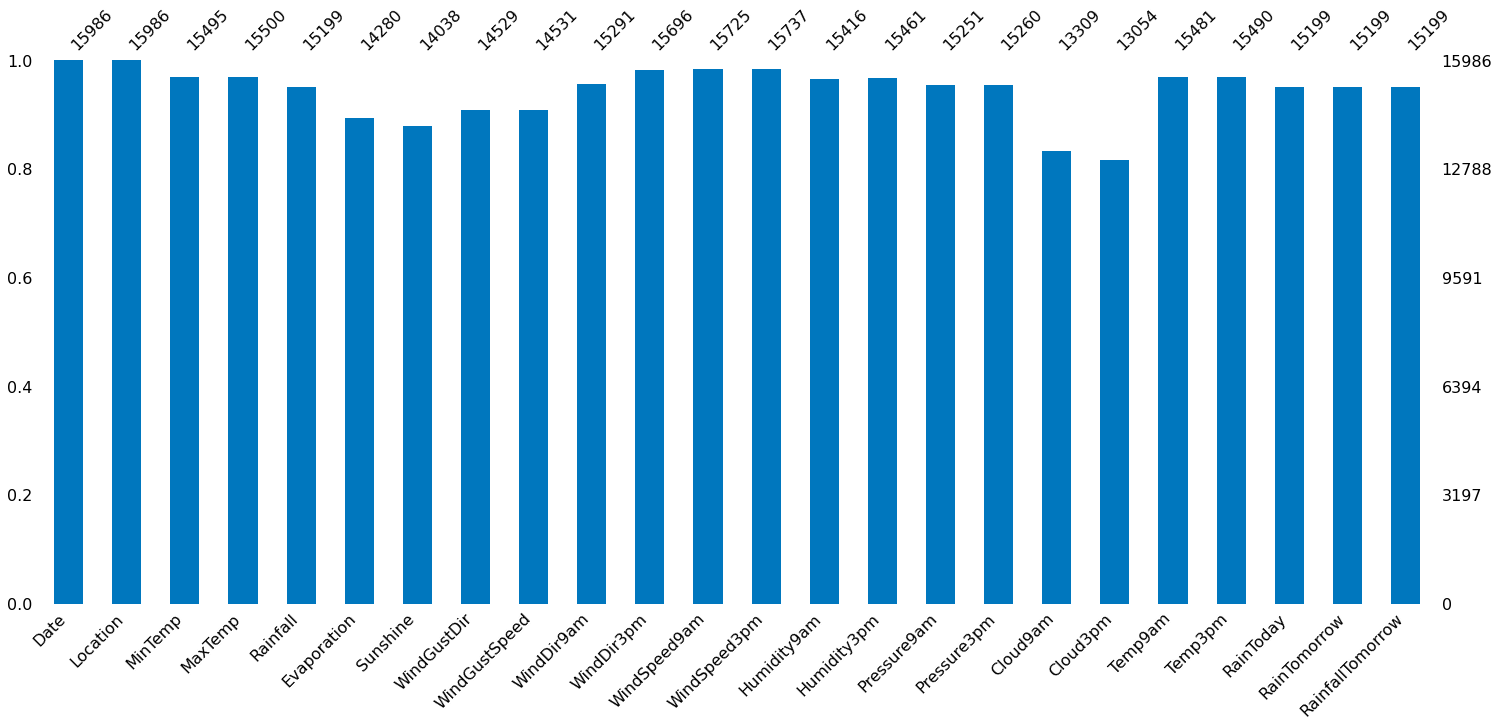

In [6]:
# Mostramos la cantidad de datos que tiene el Dataset
print(f'Cantidad de datos: {data.shape[0]}\n')

# Gráficamos la cantidad de datos que tiene cada columna para verificar datos faltantes
msno.bar(data, color='#0077be')

Este gráfico nos muestra cuantos datos faltantes tiene cada columna, cada barra representa los datos no faltantes que tiene, la totalidad de los datos es igual a 15986, por lo que si hay una barra con menor cantidad que esa significa que existen datos faltantes en ella.

## *5.3 Separar las características según su tipo*

In [7]:
# Filtramos las columnas según su tipo de variables
numerical_feature, categorical_feature, discrete_feature, continuous_feature = filter_columns_types(data)

# Creamos una tabla
table = PrettyTable(['Columnas Discretas', 'Columnas Continuas', 'Columnas Categóricas'])

# Agregamos las filas
max_length = max(len(discrete_feature), len(continuous_feature), len(categorical_feature))

for i in range(max_length):
    dis_feature = discrete_feature[i] if i < len(discrete_feature) else ''
    con_feature = continuous_feature[i] if i < len(continuous_feature) else ''
    cat_feature = categorical_feature[i] if i < len(categorical_feature) else ''

    table.add_row([dis_feature, con_feature, cat_feature])

# Mostramos la tabla
print(table)

+--------------------+--------------------+----------------------+
| Columnas Discretas | Columnas Continuas | Columnas Categóricas |
+--------------------+--------------------+----------------------+
|      Cloud9am      |      MinTemp       |         Date         |
|      Cloud3pm      |      MaxTemp       |       Location       |
|                    |      Rainfall      |     WindGustDir      |
|                    |    Evaporation     |      WindDir9am      |
|                    |      Sunshine      |      WindDir3pm      |
|                    |   WindGustSpeed    |      RainToday       |
|                    |    WindSpeed9am    |     RainTomorrow     |
|                    |    WindSpeed3pm    |                      |
|                    |    Humidity9am     |                      |
|                    |    Humidity3pm     |                      |
|                    |    Pressure9am     |                      |
|                    |    Pressure3pm     |                   

## *5.4 Verificar valores atípicos*

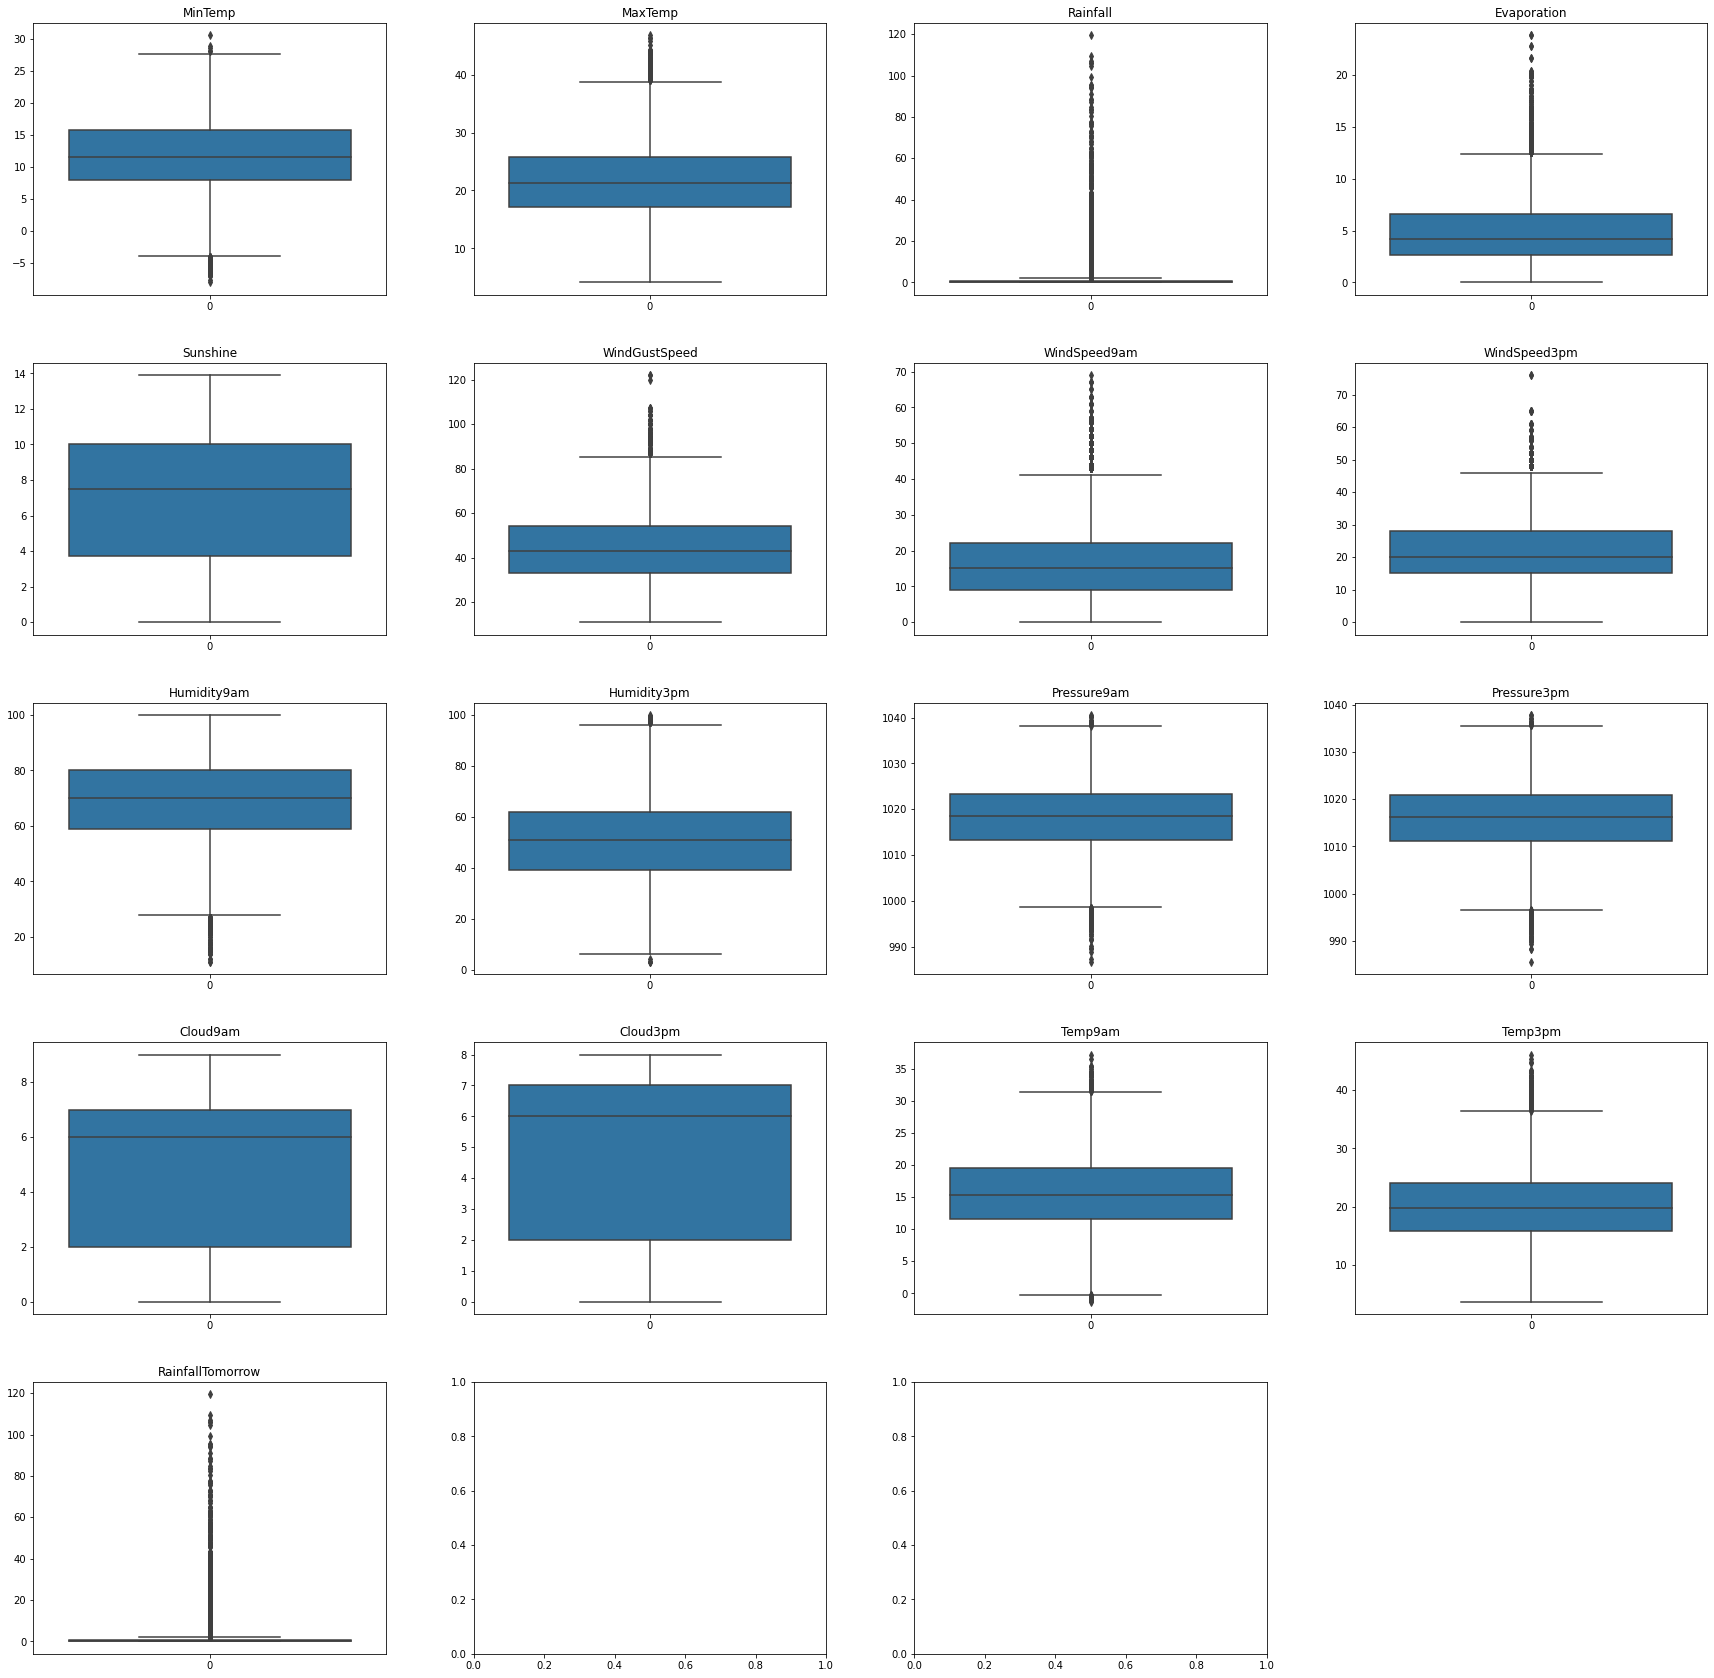

In [8]:
# Verificamos la presencia de outliers
check_outliers(data)

Estos gráficos nos muestran los datos atípicos que tiene cada columna, estos son los que estas por afuera de los pivotes tanto superior como inferior. Las columnas 'Sunshine', 'Cloud9am' y 'Cloud3pm' son las únicas que no tienen datos atípicos, las demás tienen.

## *5.5 Verificar escalado de los datos*

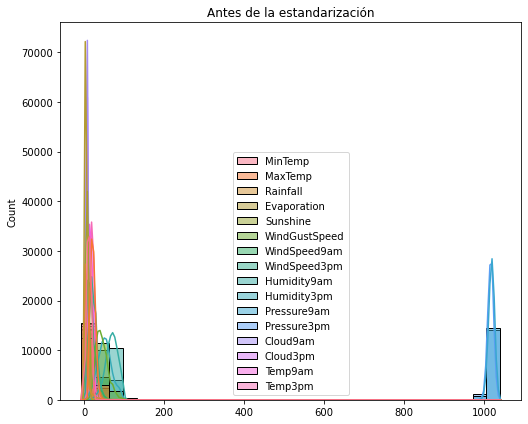

In [9]:
# Verificamos el escadalo de los datos
check_scale(data, 'Antes de la estandarización', ['RainTomorrow', 'RainfallTomorrow'])

Este gráfico nos muestra la escala de todas las columnas, como podemos ver, hay muchas variables que tienen una escala que esta entre 0 y 200 como mínimo mientrás que hay otras que pueden llegar hasta 1000, no solo la mayoría esta en una escala bastante alta sino que hay otras que directamente estan fuera de escala, esto nos muestra que necesitamos de una estandarización para poner los datos a la misma escala.

## *5.6 Verificar balanceo de la variable binaria objetivo*

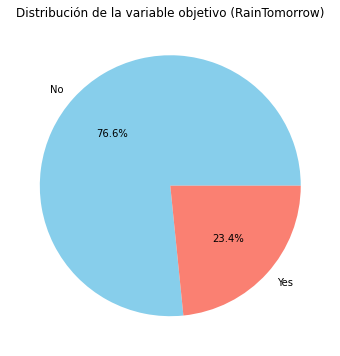

In [10]:
# Verifica la distribución de clases en la variable objetivo
class_distribution = data['RainTomorrow'].value_counts()

# Crea un gráfico pastel para visualizar la distribución
plt.figure(figsize=(6, 6))
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribución de la variable objetivo (RainTomorrow)')
plt.ylabel('')
plt.show()

Este gráfico de torta es bastante interpretativo por si solo, estamos viendo la proporción de cada valor en nuestra variable target binaria. Esto es para ver si existe un desbalanceo, como se muestra en la imagen, si existe. Hay demasiada cantidad de valores 'No' que 'Yes', por lo que es necesario aplicar un balanceo para que el entrenamiento sea lo más parejo posible.

# **6. Separación en datos de entrenamiento, test y validación**
---



In [11]:
# Seleccionamos solo las columnas deseadas para los
X = data.drop(['Date', 'RainTomorrow', 'RainfallTomorrow'], axis=1)
y = data[['RainTomorrow', 'RainfallTomorrow']]

# Dividimos los datos en conjunto de entrenamiento temporal y prueba
X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=21)

# Juntamos todos los datos de entrenamiento en un Dataset
data_train = pd.concat([X_train, y_train], axis=1)

# Hacemos lo mismo pero para los de test y validación
data_test = pd.concat([X_test, y_test], axis=1)
data_val = pd.concat([X_val, y_val], axis=1)

# Guardamos también en variables separadas, los valores de entrada para el pipeline
X_pipe = X_train

# **7. Preprocesamiento de los datos**
---

## *7.1 Imputación de datos faltantes*

In [12]:
# Imputamos los valores faltantes en los tres datasets (entrenamiento, test y validación)
# En los de test y validación usamos los estadísticos de los datos de train
data_train, data_test, data_val = null_imputation(data_train, data_test, data_val)

Cantidad de datos faltantes de entrenamiento: 0
Cantidad de datos faltantes de test: 0
Cantidad de datos faltantes de validación: 0


## *7.2 Solución de outliers (valores atípicos)*

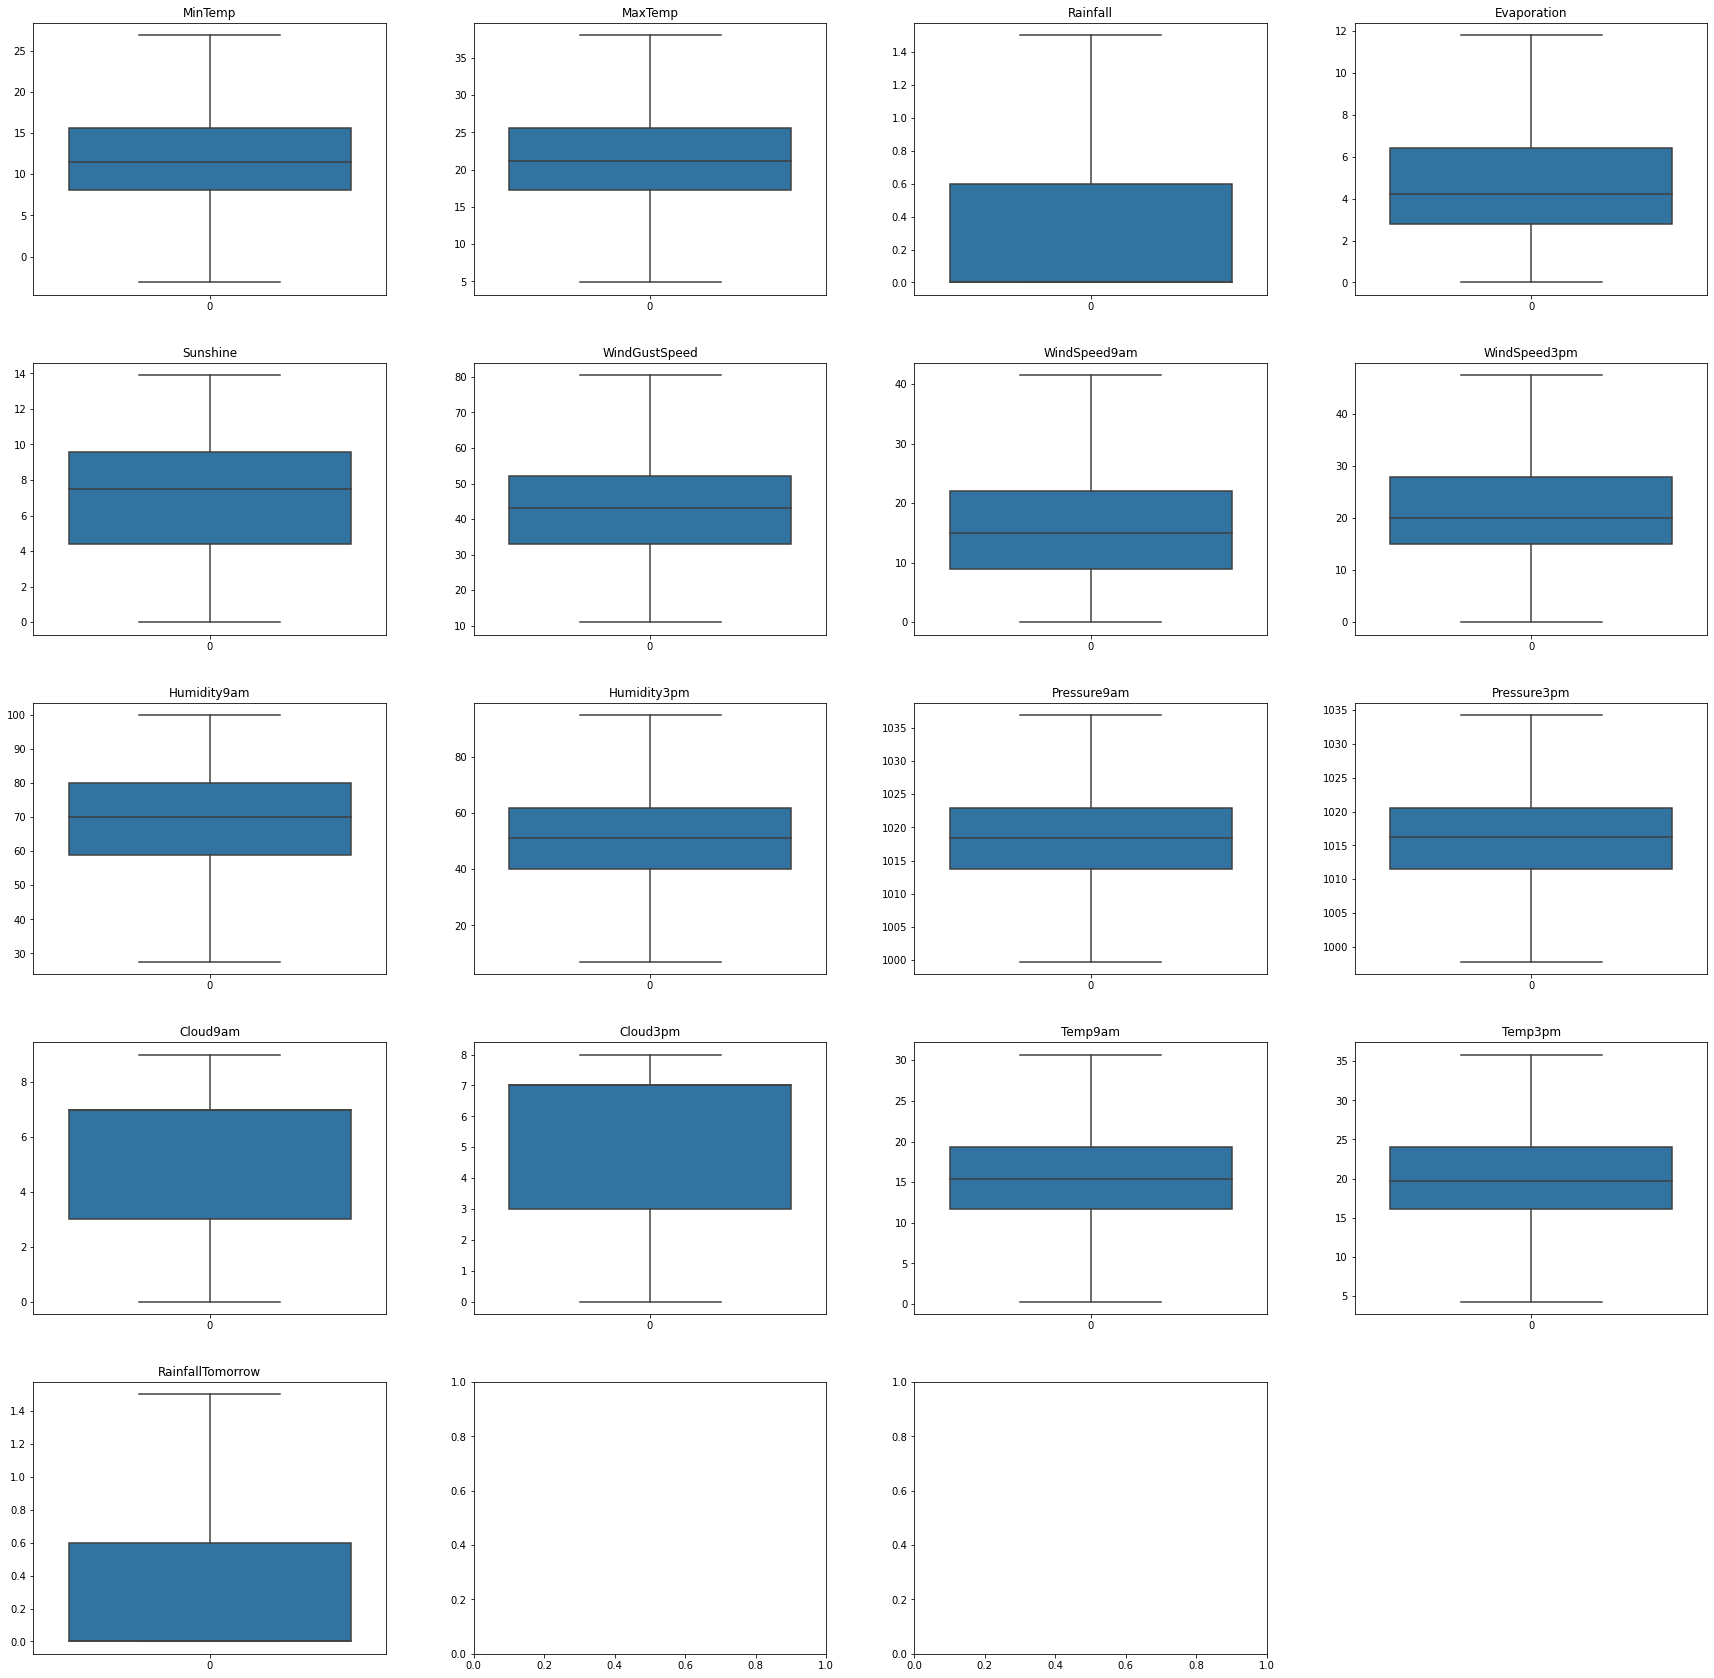

In [13]:
# Solucionamos los outliers en los tres datasets (entrenamiento, test y validación)
data_train, data_test, data_val = ourliers_solution(data_train, data_test, data_val)

# Verificamos la presencia de outliers, como 'data_train', 'data_test' son muy parecidos,
# con mostrar los outliers de un solo dataset es suficiente para descartar, a su vez, la presencia
# de valores atípicos en los otros.
check_outliers(data_train)

A diferencia de la primera versión de esto gráficos, ahora no hay valores por encima o debajo de los pivotes, teniendo todos los valores dentro del rango común de datos.

## *7.3 Selección de características*

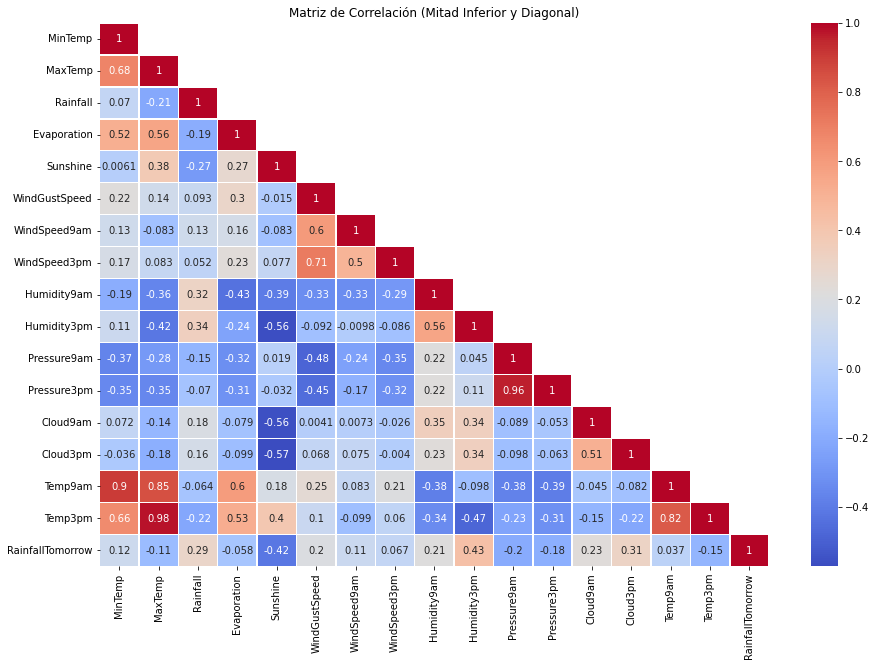

In [14]:
# Calcular la matriz de correlación
correlation_matrix = data_train.corr(method='pearson')

# Crear una máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Mostramos la mitad inferior y la diagonal de la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Matriz de Correlación (Mitad Inferior y Diagonal)')
plt.show()

Las **característica** que vamos a seleccionar van a ser todas, la única que se eliminó fue 'Date' que, considero, no aporta información ya que el *'cuando se tomaron los datos'* no es suficiente como para que se pueda considerar una variable explicativa. Por lo tanto, vamos a elegir todas las variables, exceptuando las variables de estudio *('RainfallTomorrow' y 'RainTomorrow')*, como **variables explicativas**.

## *7.4 Visualización de las características*

### **7.4.1 Histograma de 'WindSpeed', 'Humidity', 'Pressure' y 'Temp'**

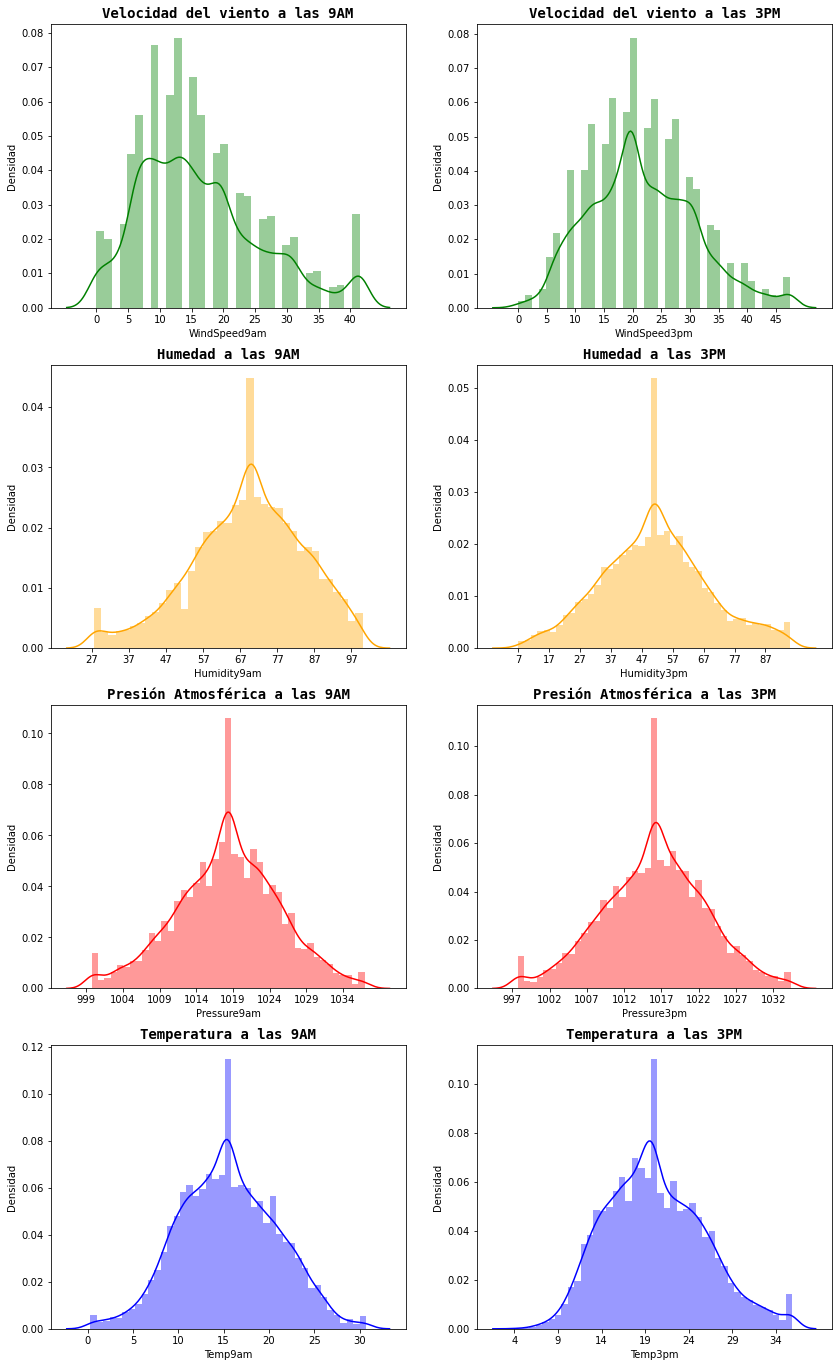

In [15]:
# Creamos los subplots para gráficar después en forma de pares
fig, ax = plt.subplots(4, 2, figsize=(14, 24))

''' Velocidad del viento a las 9AM y 3PM '''
# WindSpeed9am
sns.distplot(data_train['WindSpeed9am'], ax=ax[0,0], color='green')
ax[0,0].set_title('Velocidad del viento a las 9AM', fontsize=14, fontweight='bold', fontfamily='monospace')
ax[0,0].set_ylabel('Densidad')

# Ajustar ticks para la subgráfica WindSpeed9am
ticks_wind_speed_9am = np.arange(data_train['WindSpeed9am'].min(), data_train['WindSpeed9am'].max() + 1, 5)
ax[0,0].set_xticks(ticks_wind_speed_9am)

# WindSpeed3pm
sns.distplot(data_train['WindSpeed3pm'], ax=ax[0,1], color='green')
ax[0,1].set_title('Velocidad del viento a las 3PM', fontsize=14, fontweight='bold', fontfamily='monospace')
ax[0,1].set_ylabel('Densidad')

# Ajustar ticks para la subgráfica WindSpeed3pm
ticks_wind_speed_3pm = np.arange(data_train['WindSpeed3pm'].min(), data_train['WindSpeed3pm'].max() + 1, 5)
ax[0,1].set_xticks(ticks_wind_speed_3pm)

''' Humedad a las 9AM y 3PM '''
# Humidity9am
sns.distplot(data_train['Humidity9am'], ax=ax[1,0], color='orange')
ax[1,0].set_title('Humedad a las 9AM', fontsize=14, fontweight='bold', fontfamily='monospace')
ax[1,0].set_ylabel('Densidad')

# Ajustar ticks para la subgráfica Humidity9am
ticks_humidity_9am = np.arange(data_train['Humidity9am'].min() - .5, data_train['Humidity9am'].max() + 1, 10)
ax[1,0].set_xticks(ticks_humidity_9am)

# Humidity3pm
sns.distplot(data_train['Humidity3pm'], ax=ax[1,1], color='orange')
ax[1,1].set_title('Humedad a las 3PM', fontsize=14, fontweight='bold', fontfamily='monospace')
ax[1,1].set_ylabel('Densidad')

# Ajustar ticks para la subgráfica Humidity3pm
ticks_humidity_3pm = np.arange(data_train['Humidity3pm'].min(), data_train['Humidity3pm'].max() + 1, 10)
ax[1,1].set_xticks(ticks_humidity_3pm)

''' Presión Atmosférica a las 9AM y 3PM '''
# Pressure9am
sns.distplot(data_train['Pressure9am'], ax=ax[2,0], color='red')
ax[2,0].set_title('Presión Atmosférica a las 9AM', fontsize=14, fontweight='bold', fontfamily='monospace')
ax[2,0].set_ylabel('Densidad')

# Ajustar ticks para la subgráfica Pressure9am
ticks_pressure_9am = np.arange(data_train['Pressure9am'].min() - .75, data_train['Pressure9am'].max() + 1, 5)
ax[2,0].set_xticks(ticks_pressure_9am)

# Pressure3pm
sns.distplot(data_train['Pressure3pm'], ax=ax[2,1], color='red')
ax[2,1].set_title('Presión Atmosférica a las 3PM', fontsize=14, fontweight='bold', fontfamily='monospace')
ax[2,1].set_ylabel('Densidad')

# Ajustar ticks para la subgráfica Pressure3pm
ticks_pressure_3pm = np.arange(data_train['Pressure3pm'].min() - .73, data_train['Pressure3pm'].max() + 1, 5)
ax[2,1].set_xticks(ticks_pressure_3pm)

''' Temperatura a las 9AM y 3PM '''
# Temp9am
sns.distplot(data_train['Temp9am'], ax=ax[3,0], color='blue')
ax[3,0].set_title('Temperatura a las 9AM', fontsize=14, fontweight='bold', fontfamily='monospace')
ax[3,0].set_ylabel('Densidad')

# Ajustar ticks para la subgráfica Temp9am
ticks_temp_9am = np.arange(data_train['Temp9am'].min() - .3, data_train['Temp9am'].max() + 1, 5)
ax[3,0].set_xticks(ticks_temp_9am);

# Temp3pm
sns.distplot(data_train['Temp3pm'], ax=ax[3,1], color='blue')
ax[3,1].set_title('Temperatura a las 3PM', fontsize=14, fontweight='bold', fontfamily='monospace')
ax[3,1].set_ylabel('Densidad')

# Ajustar ticks para la subgráfica Temp3pm
ticks_temp_3pm = np.arange(data_train['Temp3pm'].min() - .25, data_train['Temp3pm'].max() + 1, 5)
ax[3,1].set_xticks(ticks_temp_3pm);

Lo que podemos analizar a partir de estos gráficos son la frecuencia con la que se presentan cada valor de cada par de gráfica. Como cada par esta comprendido por valores medidos en horarios diferentes *(Mañana: 9AM. Tarde: 3PM)*, podemos ver si en diferentes horarios existe un cambio en cada medida *(Velocidad del viento, Humedad, Presión Atmosférica y Temperatura)*.

**Velocidad del viento**: a la mañana la velocidad del viento más frecuente esta entre un rango de 10 y 15km/h, podemos promediar a 13.5km/h mientras que a la tarde es prácticamente 20km/h, lo que significaría un aumento del ≈ 48% a la tarde, teniendo una notable diferencia.

**Humedad**: a la mañana se ve que el valor más frecuente esta entre un rango de 67 y 77% de humedad, vamos a promediar en 72% mientras que a la tarde esta en un rango de 47 y 57%, promediando en 52%, lo que significaría un decrecimiento del ≈ 28% a la tarde, también siendo una diferencia a destacar.

**Presión Atmosférica**: a la mañana se ve que el rango del valor más frecuenta esta muy cerca de 1019hpa, por lo vamos a tomar el valor anterior, 1018hpa y a la tarde pasa lo mismo con el valor 1017hpa, por lo que el valor que vamos a tomar es 1016hpa. Esto significaría un decrecimiento del ≈ 0.2% siendo esta una diferencia despreciable.

**Temperatura**: a la mañana se ve que la temperatura más frecuenta ronda los 15°C mientras que a la tarde ronda entre 19 y 24°C, vamos a promediar en 21.5°C, lo que significaría un aumento del ≈ 43% siendo esta una diferencia notable al igual que con la velocidad del viento.

### **7.3.2 Cantidad de lluvia promedio por ciudad**

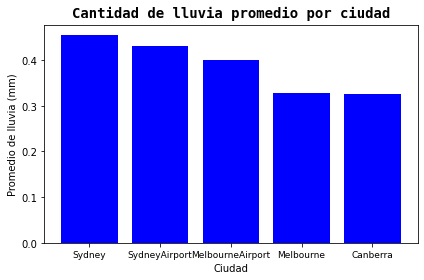

In [16]:
# Calculamos la cantidad de lluvia promedio por ciudad
average_precipitation_by_region = (
    data_train.groupby(['Location'])['Rainfall']
    .mean()
    .reset_index()
    .sort_values(by='Rainfall', ascending=False)
)

# Creamos el gráfico
plt.bar(average_precipitation_by_region['Location'], average_precipitation_by_region.iloc[:, 1], color='blue')

# Le ponemos un título
plt.text(0.5, 1.02, 'Cantidad de lluvia promedio por ciudad', fontsize=14, fontweight='bold', fontfamily='monospace', ha='center', va='bottom', transform=plt.gca().transAxes)

# Señalizamos cada eje
plt.xlabel('Ciudad')
plt.ylabel('Promedio de lluvia (mm)')
plt.tick_params(axis='x', labelsize=9)

# Lo mostramos
plt.tight_layout()
plt.show()

En este gráfico podemos analizar rápidamente nuestro cometido, tanto Sydney como SydneyAirport son las ciudades donde mayor cantidad de lluvia cayó.

### **7.3.3 Proporción de días lluviosos por ciudad**

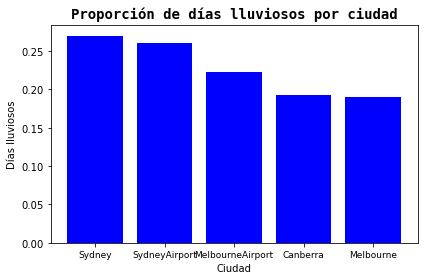

In [17]:
# Calculamos la proporción de días en los que llovió en cada ciudad
average_rain_today_by_region = (
    data_train.groupby(['Location'])['RainToday']
    .apply(lambda x: (x == 'Yes').mean())
    .reset_index()
    .sort_values(by='RainToday', ascending=False)
)

# Creamos el gráfico
plt.bar(average_rain_today_by_region['Location'], average_rain_today_by_region.iloc[:, 1], color='blue')

# Le ponemos un título
plt.text(0.5, 1.02, 'Proporción de días lluviosos por ciudad', fontsize=14, fontweight='bold', fontfamily='monospace', ha='center', va='bottom', transform=plt.gca().transAxes)

# Señalizamos cada ejes
plt.xlabel('Ciudad')
plt.ylabel('Días lluviosos')
plt.tick_params(axis='x', labelsize=9)

# Lo mostramos
plt.tight_layout()
plt.show()

En este pasa lo mismo con el anterior, pero a la vez podemos sumas ambos análisis para verificar la correlación. En este gráfico nos muestra que también las ciudad de Sydney y SydneyAirport son los lugares en donde llueve en mayor proporción, es decir, llueve más lo cual tiene correlación directa con el anterior que nos mostraba que en estas dos ciudades en donde más milimetros de lluvia cayó.

### **7.3.4 Relación entre 'Sunshine' y 'Rainfall'**

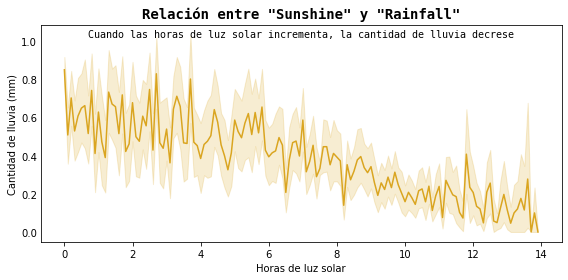

In [18]:
# Creamos el gráfico
plt.figure(figsize=(8, 4), facecolor='white')
sns.lineplot(data=data_train, x='Sunshine', y='Rainfall', color='goldenrod')

# Le ponemos un título con el primero texto y un subtítulo con el segundo
plt.text(0.5, 1.02, 'Relación entre "Sunshine" y "Rainfall"', fontsize=14, fontweight='bold', fontfamily='monospace', ha='center', va='bottom', transform=plt.gca().transAxes)
plt.text(0.5, 0.98, 'Cuando las horas de luz solar incrementa, la cantidad de lluvia decrese', fontsize=10, fontweight='light', fontfamily='monospace', ha='center', va='top', transform=plt.gca().transAxes)

# Señalizamos los ejes
plt.ylabel('Cantidad de lluvia (mm)')
plt.xlabel('Horas de luz solar')
plt.tick_params(axis='y', length=0)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

### **7.3.5 Velocidad promedio del viento en cada ciudad**

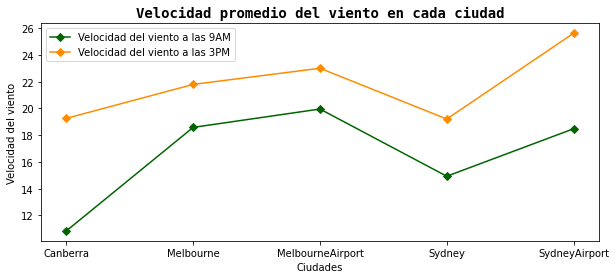

In [19]:
# Creamos un dataframe temporal para guardar los promedios de cada columna de viento
windspeed_weather_df = data_train.groupby(['Location'])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()

# Creamos el gráfico
plt.figure(figsize = (10, 4))
plt.plot(windspeed_weather_df.loc[:, 'Location'], windspeed_weather_df['WindSpeed9am'], marker='D', color = 'darkgreen', label = 'Velocidad del viento a las 9AM')
plt.plot(windspeed_weather_df.loc[:, 'Location'], windspeed_weather_df['WindSpeed3pm'], marker='D', color = 'darkorange', label = 'Velocidad del viento a las 3PM')

# Señalizamos los ejes
plt.xlabel('Ciudades')
plt.ylabel('Velocidad del viento')

# Le ponemos un título
plt.title('Velocidad promedio del viento en cada ciudad', fontsize=14, fontweight='bold', fontfamily='monospace')

# Lo mostramos
plt.legend()
plt.show()

Como podemos ver, la velocidad promedio del viento que hay a la mañana en cada ciudad aumenta a la tarde, siendo las ciudades de **Canberra** y **SydneyAirport** la que varían mucho más que la demás.

### **7.3.6 Humedad promedio en cada ciudad**

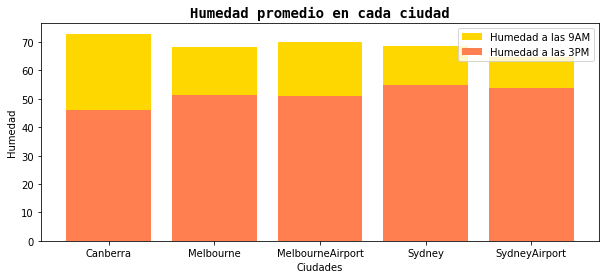

In [20]:
# Calculamos la humedad promedio en cada ciudad
humidity_weather_df = data_train.groupby(['Location'])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()

# Creamos el gráfico
plt.figure(figsize = (10, 4))
plt.bar(humidity_weather_df.loc[:, 'Location'], humidity_weather_df['Humidity9am'], color = 'gold', label = 'Humedad a las 9AM')
plt.bar(humidity_weather_df.loc[:, 'Location'], humidity_weather_df['Humidity3pm'], color = 'coral',label = 'Humedad a las 3PM')

# Señalizamos cada eje
plt.xlabel('Ciudades')
plt.ylabel('Humedad')

# Le ponemos un título
plt.title('Humedad promedio en cada ciudad', fontsize=14, fontweight='bold', fontfamily='monospace')

# Lo mostramos
plt.legend()
plt.show()

En este gráfico prácticamente entre ciudad y ciudad no se diferencia un cambio notable entre las humedades entre cada una, por otro lado si se ve una diferencia entre la mañana y la tarde, algo que ya analizamos.

### **7.3.7 Presión Atmosférica promedio en cada ciudad**

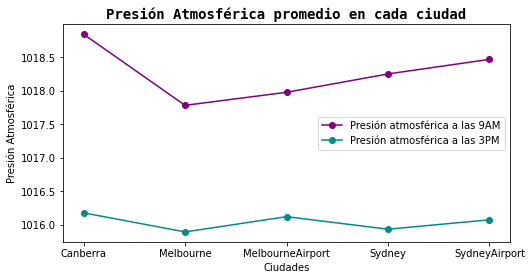

In [21]:
# Calcuamos la presión atmosférica en cada ciudad
pressure_weather_df = data_train.groupby(['Location'])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()

# Creamos el gráfico
plt.figure(figsize = (8, 4))
plt.plot(pressure_weather_df.loc[:, 'Location'], pressure_weather_df['Pressure9am'], marker='o', color = 'purple', label = 'Presión atmosférica a las 9AM')
plt.plot(pressure_weather_df.loc[:, 'Location'], pressure_weather_df['Pressure3pm'], marker='o', color = 'darkcyan', label = 'Presión atmosférica a las 3PM')

# Señalizamos cada eje
plt.xlabel('Ciudades')
plt.ylabel('Presión Atmosférica')

# Le ponemos un título
plt.title('Presión Atmosférica promedio en cada ciudad', fontsize=14, fontweight='bold', fontfamily='monospace')

# Lo mostramos
plt.legend()
plt.show()

La presión atmosférica en este gráfico parece que existe una gran diferencia entre la presión de la mañana y la tarde pero, la realidad, es que no es así demostrado en el primer análisis, solo que la escala puede engañar pero es necesario para tener una mejor visualización. Por otro lado, como análisis principal de las ciudades, **Canberra** parece ser la ciudad con mayor humedad tanto a la mañana como a la tarde.

### **7.3.8 Promedio de cada temperatura por ciudad**

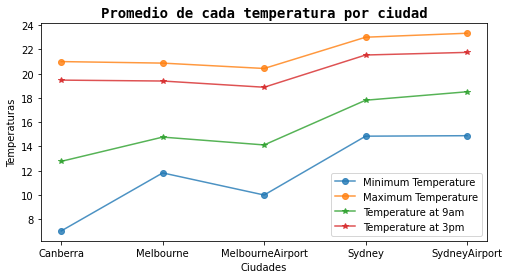

In [22]:
# Calculamos el promedio de cada temperatura, mínima, máxmia, mañana y tarde
location_weather_df = data_train.groupby(['Location'])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
location_weather_df = location_weather_df.reset_index()

# Creamos el gráfico
plt.figure(figsize = (8, 4))
plt.plot(location_weather_df.loc[:, 'Location'], location_weather_df['MinTemp'], label = 'Minimum Temperature', marker='o', alpha = 0.8)
plt.plot(location_weather_df.loc[:, 'Location'], location_weather_df['MaxTemp'], label = 'Maximum Temperature', marker='o', alpha = 0.8)
plt.plot(location_weather_df.loc[:, 'Location'], location_weather_df['Temp9am'], label = 'Temperature at 9am', marker='*', alpha = 0.8)
plt.plot(location_weather_df.loc[:, 'Location'], location_weather_df['Temp3pm'], label = 'Temperature at 3pm', marker='*', alpha = 0.8)

# Señalizamos cada eje
plt.xlabel('Ciudades')
plt.ylabel('Temperaturas')

# Le ponemos un título
plt.title('Promedio de cada temperatura por ciudad', fontsize=14, fontweight='bold', fontfamily='monospace')

# Lo mostramos
plt.legend()
plt.show()

El primer análisis que podemos hacer es sobre las ciudades, podemos ver que **Sydney** y **SydneyAirport** son las ciudades con mayor temperatura, mientras que **Canberra** la que menor tiene. Como segundo análisis podemos ver que las temperaturas mínimas estan muy relacionadas con las temperaturas medidas a la mañana, mientras que en el lado inverso pasa lo mismo, la temperatura máxima esta muy relacionada con la temperatura medida a la tarde, con relacionada me refiero a que se parecen mucho sus gráficas, algo que tambien podemos saber viendo la matriz de correlación.

## *7.4 Estandarización de los datos*

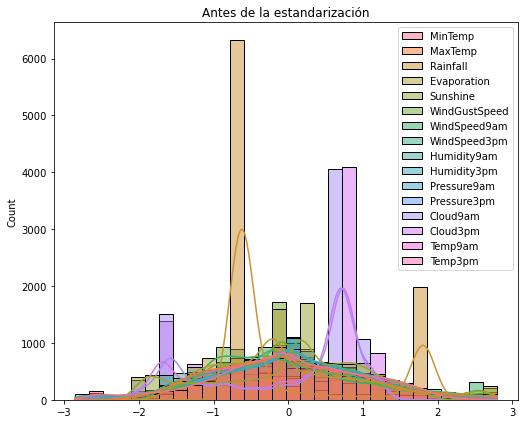

In [23]:
# Filtramos las columnas según su tipo de variables
numerical_feature, categorical_feature, discrete_feature, continuous_feature = filter_columns_types(data_train)

# Creamos el scaler con la clase personalizada para estandarizar
scaler = CustomStandardScaler(discarded_columns=categorical_feature + ['RainfallTomorrow'])

# Fiteamos el scaler con los datos de entrenamiento y transformamos los datos
data_train = scaler.fit_transform(data_train)

# Aplicamos solo la transformación para los datos de test y validación
data_test = scaler.transform(data_test)
data_val = scaler.transform(data_val)

# Verificamos el escadalo de los datos
check_scale(data_train, 'Antes de la estandarización', categorical_feature + ['RainfallTomorrow'])

En la versión anterior teniamos varibles con alta escala, prácticamente entre 0 y 200 y habia algunas que tenian una escala muchisimo más alta, cerca de 1000 unidades. Ahora nos quedaron los datos en una media de 0 y un desvio estándar de 3, quedandonos todas las varibles en la misma escala.

## *7.5 Codificación de variables categóricas*

In [24]:
# Convertimos las columnas categóricas restantes a numéricos ('Date' y 'Location' no tienen valores faltantes y en 'RainToday' y 'RainTomorrow' vamos a usar otro método)
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10, 'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10, 'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10, 'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
location = { 'Sydney': 1, 'SydneyAirport': 2, 'MelbourneAirport': 3, 'Melbourne': 4, 'Canberra': 5}

# Lista de columnas categóricas que necesitan ser mapeadas
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location']

# Definimos las funciones de mapeo para cada columna
mapping_functions = {
    'WindGustDir': windgustdir,
    'WindDir9am': winddir9am,
    'WindDir3pm': winddir3pm,
    'Location': location
}

# Aplicamos los mapeos en todos los conjuntos de datos (entrenamiento, test y validación)
for dataset in [data_train, data_test, data_val]:

    # Mapeamos las columnas categóricas
    for column in categorical_columns:
        dataset[column] = dataset[column].map(mapping_functions[column])

    # Reemplazamos los 'Yes' por 1 y 'No' por 0 en las columnas 'RainToday' y 'RainTomorrow'
    dataset['RainToday'] = pd.get_dummies(dataset['RainToday'], drop_first=True)
    dataset['RainTomorrow'] = pd.get_dummies(dataset['RainTomorrow'], drop_first=True)

## *7.6 Balanceo de la variable binaría objetivo*

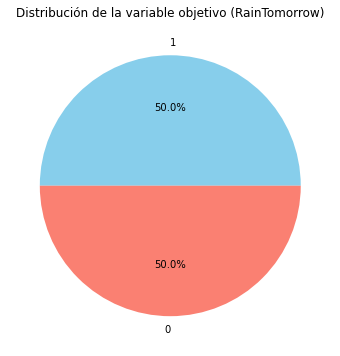

In [25]:
# Separar características (X) y variable objetivo (y)
X = data_train.drop('RainTomorrow', axis=1)
y = data_train['RainTomorrow']

# Aplicar SMOTE para realizar el sobremuestreo solo en el conjunto de entrenamiento
smote = SMOTE(random_state=21)
X_resampled, y_resampled = smote.fit_resample(np.array(X), y)

# Combinar X_resampled e y_resampled en un nuevo DataFrame
data_train = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='RainTomorrow')], axis=1)

# # Verifica la distribución de clases en la variable objetivo
class_distribution = data_train['RainTomorrow'].value_counts()

# Crea un gráfico pastel para visualizar la distribución
plt.figure(figsize=(6, 6))
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribución de la variable objetivo (RainTomorrow)')
plt.ylabel('')
plt.show()

Ahora los datos estan balanceados como se puede ver, ya que existe la misma proporción de datos 1 ('Yes') que era la clase minoritaria como habiamos visto antes que 0 ('No').

# **8. División de los Dataset (train, test y val) en X e Y para cada modelo**
---


In [26]:
# Guardamos en una lista las columnas que vamos a sacar de los dataset (las dos targets)
discarted_columns = ['RainTomorrow', 'RainfallTomorrow']

''' Seleccionamos solo las columnas deseadas para los modelos donde predecimos 'RainTomorrow' '''
# Datos de entrenamiento
X_rain_train = data_train.drop(discarted_columns, axis=1)
y_rain_train = data_train['RainTomorrow']

# Datos de test
X_rain_test = data_test.drop(discarted_columns, axis=1)
y_rain_test = data_test['RainTomorrow']

# Datos de validación
X_rain_val = data_val.drop(discarted_columns, axis=1)
y_rain_val = data_val['RainTomorrow']

''' Seleccionamos solo las columnas deseadas para los modelos donde predecimos 'RainfallTomorrow' '''
# Datos de entrenamiento
X_rainfall_train = data_train.drop(discarted_columns, axis=1)
y_rainfall_train = data_train['RainfallTomorrow']

# Datos de test
X_rainfall_test = data_test.drop(discarted_columns, axis=1)
y_rainfall_test = data_test['RainfallTomorrow']

# Datos de validación
X_rainfall_val = data_val.drop(discarted_columns, axis=1)
y_rainfall_val = data_val['RainfallTomorrow']

# **9. Métodos de Gradientes Descientes**
---

## *9.1 Gradiente Desciente*

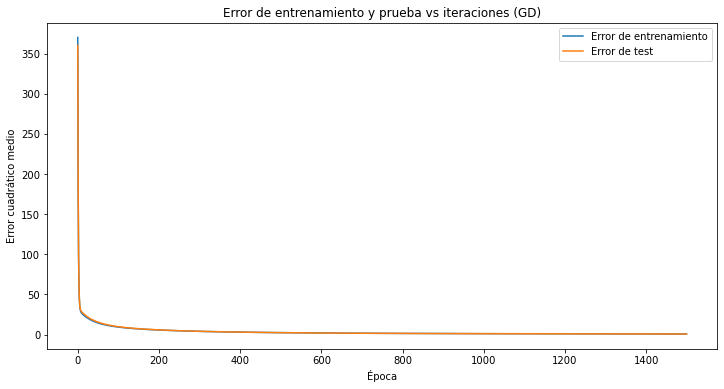

Mejores hiperparámetros: {'lr': 0.001, 'epochs': 1500, 'loss': 0.7979785611709262}
Tiempo total de entrenamiento: 10 seconds.



In [ ]:
# Entrenamos el modelo con un grid search manual para optimizar los hiperparámetros
gd_best_params = grid_search_gd('gradient_descent',
                                X_rainfall_train, y_rainfall_train,
                                X_rainfall_test, y_rainfall_test)

## *9.2 Gradiente Desciente Estocástico*

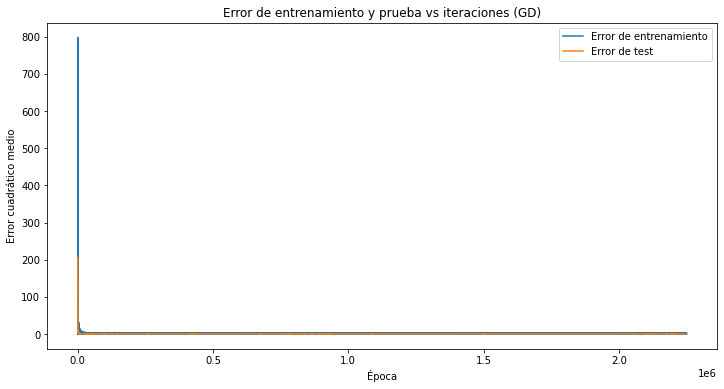

Mejores hiperparámetros: {'lr': 0.0001, 'epochs': 1500, 'loss': 0.24251446654061518}
Tiempo total de entrenamiento: 20 minutes 37 seconds.



In [ ]:
# Entrenamos el modelo con un grid search manual para optimizar los hiperparámetros
sgd_best_params = grid_search_gd('stochastic_gradient_descent',
                                 X_rainfall_train[:1500], y_rainfall_train[:1500],
                                 X_rainfall_test[:1500], y_rainfall_test[:1500])

## *9.3 Gradiente Desciente Mini-Batch*

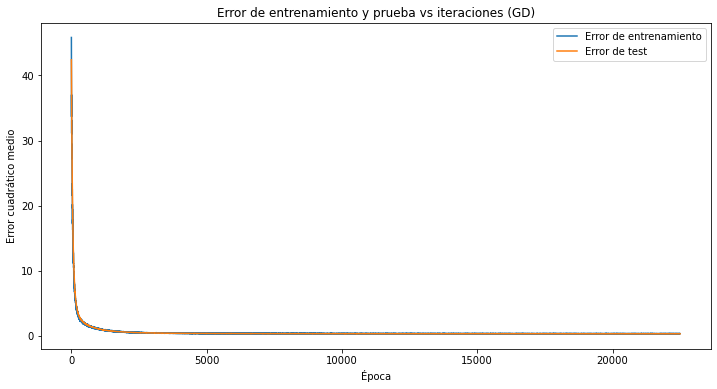

Mejores hiperparámetros: {'lr': 0.001, 'epochs': 1500, 'loss': 0.31287132720177757}
Tiempo total de entrenamiento: 45 seconds.



In [ ]:
# Entrenamos el modelo con un grid search manual para optimizar los hiperparámetros
mbgd_best_params = grid_search_gd('mini-batch_gradient_descent',
                                  X_rainfall_train, y_rainfall_train,
                                  X_rainfall_test, y_rainfall_test)

# **10. Modelos Base**
---

## *10.1 Regresión*

In [ ]:
## Regresión lineal simple:
# Vamos a hacer una regresión lineal pero con una única variable, con 'Sunshine'

# Creamos una instancia del modelo de Regresión Lineal
linear_model = LinearRegression()

# Lo entrenamos
linear_model.fit(X_rainfall_train['Sunshine'].values.reshape(-1, 1), y_rainfall_train)

# Realizamos predicciones en los datos de prueba
Y_pred = linear_model.predict(X_rainfall_test['Sunshine'].values.reshape(-1, 1))

# Calculamos las métricas
r2 = r2_score(y_rainfall_test, Y_pred)
mse = mean_squared_error(y_rainfall_test, Y_pred)
mae = mean_absolute_error(y_rainfall_test, Y_pred)

# Creamos una tabla
table = PrettyTable(['Métrica', 'Valor'])

# Agregamos las filas a la tabla
table.add_row(['R2', f'{r2:.5f}'])
table.add_row(['MSE', f'{mse:.5f}'])
table.add_row(['MAE', f'{mae:.5f}'])

# Mostramos la tabla
print(table)

+---------+----------+
| Métrica |  Valor   |
+---------+----------+
|    R2   | -0.02763 |
|   MSE   | 0.38222  |
|   MAE   | 0.54134  |
+---------+----------+


## *10.2 Clasificación*

In [ ]:
'''
Criterio ingenuo:
Si el valor que hay en 'Rainfall', que significa la cantidad de lluvia que cayo hoy pero en mm, es un número positivo
(esto es por la estandarización, todos los valores negativos representan que no llovió ese día y los positivos que sí)
entonces el día de mañana lloverá.
'''

# Creamos un DataFrame para guardar las predicciones
predictions_data = []

# Recorreremos cada fila de nuestros datos
for index, row in X_rain_train.iterrows():
    # Accedemos al valor de 'RainToday'
    rainfall = row['Rainfall']

    # Aplicamos la condición
    if rainfall > 0:
        # Agregamos el valor 1 indicando que va a llover mañana
        predictions_data.append(1)
    else:
        # Agregamos el valor 0 indicando que no va a llover mañana
        predictions_data.append(0)

# Creamos una Serie de Pandas para guardar las predicciones
predictions_rain = pd.Series(predictions_data, name='RainTomorrow')

# Calculamos métricas para la clase positiva (presencia de lluvia)
precision_positive = precision_score(y_rain_train, predictions_rain, pos_label=1)
recall_positive = recall_score(y_rain_train, predictions_rain, pos_label=1)
f1_score_positive = f1_score(y_rain_train, predictions_rain, pos_label=1)

# Calculamos métricas para la clase negativa (ausencia de lluvia)
precision_negative = precision_score(y_rain_train, predictions_rain, pos_label=0)
recall_negative = recall_score(y_rain_train, predictions_rain, pos_label=0)
f1_score_negative = f1_score(y_rain_train, predictions_rain, pos_label=0)

# Creamos la tabla
table = PrettyTable(['Métrica', 'Clase Positiva (1)', 'Clase Negativa (0)'])

# Agregamos las filas
table.add_row(['Precision', f'{precision_positive:.3f}', f'{precision_negative:.3f}'])
table.add_row(['Recall', f'{recall_positive:.3f}', f'{recall_negative:.3f}'])
table.add_row(['F1 Score', f'{f1_score_positive:.3f}', f'{f1_score_negative:.3f}'])

# Mostramos la tabla
print(table)

+-----------+--------------------+--------------------+
|  Métrica  | Clase Positiva (1) | Clase Negativa (0) |
+-----------+--------------------+--------------------+
| Precision |       0.682        |       0.604        |
|   Recall  |       0.497        |       0.768        |
|  F1 Score |       0.575        |       0.677        |
+-----------+--------------------+--------------------+


# **11. Entrenamiento de modelos con Optimización de Hiperparámetros y Validación Cruzada**
---

## *11.1 Regresión*

### **11.1.1 Regresión Lineal Múltiple**

In [27]:
''' Opmimización de hiperparámetros '''
# Iniciamos el contador para calcular después el tiempo final de entrenamiento
start = time.time()

# Creamos instancias de los modelos
linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

# Definimos los parámetros que queremos probar
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Creamos objetos GridSearchCV para cada modelo
'''
El modelo base de Regresión Lineal no tiene Optimización de Hiperparámetros, por
eso no se hace un grid search y tampoco al final se muestran sus "mejores hiperparámetros".
Cuando se calculen las métricas, vamos a calcular también las de este modelo para ver
cual es el mejor de todos, si alguno de los regularizadores o la Regresión Lineal base.
'''
lasso_grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
elasticnet_grid_search = GridSearchCV(elasticnet_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustamos los modelos a los datos de entrenamiento
linear_model.fit(X_rainfall_train, y_rainfall_train)
lasso_grid_search.fit(X_rainfall_train, y_rainfall_train)
ridge_grid_search.fit(X_rainfall_train, y_rainfall_train)
elasticnet_grid_search.fit(X_rainfall_train, y_rainfall_train)

end = time.time()
time_difference_seconds = end - start
hours, remainder = divmod(time_difference_seconds, 3600)
minutes, seconds = divmod(remainder, 60)

# Mostramos los mejores hiperparámetros encontrados
print(f'Mejores hiperparámetros para Lasso: {lasso_grid_search.best_params_}\nMejores hiperparámetros para Ridge: {ridge_grid_search.best_params_}\nMejores hiperparámetros para Elastic Net: {elasticnet_grid_search.best_params_}\n')

# Mostramos el tiempo de entrenamiento transcurrido
print(f'Tiempo total de entrenamiento: {int(seconds)} seconds.')

Mejores hiperparámetros para Lasso: {'alpha': 0.001}
Mejores hiperparámetros para Ridge: {'alpha': 0.001}
Mejores hiperparámetros para Elastic Net: {'alpha': 0.001}

Tiempo total de entrenamiento: 10 seconds.


### **11.1.2 Redes Neuronales para Regresión**

#### *11.1.2.1 Buscamos el mejor modelo*

In [44]:
# Iniciamos el contador para calcular después el tiempo final de entrenamiento
start = time.time()

# Definimos la función para crear el modelo
def create_model(trial):
    model = Sequential()

    # Número de capas ocultas
    num_layers = trial.suggest_int('num_layers', 4, 25)

    # Número de neuronas por capa
    num_neurons_ent = trial.suggest_int('num_neurons_ent', 16, 500)

    # Función de activación
    activation_ent = trial.suggest_categorical('activation_ent', ['relu', 'tanh', 'elu', 'selu', 'linear'])

    # Tasa de aprendizaje
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

    # Regularización L1 o L2 (o ambas)
    regularizer = trial.suggest_categorical('regularizer', [None, 'l1', 'l2', 'l1_l2'])
    reg_strength = trial.suggest_float('reg_strength', 1e-6, 1e-2, log=True)

    # Añadimos capas ocultas según los hiperparámetros
    if regularizer == 'l1': regularizer = l1(reg_strength)
    elif regularizer == 'l2': regularizer = l2(reg_strength)
    elif regularizer == 'l1_l2': regularizer = l1_l2(l1=reg_strength, l2=reg_strength)
    else: regularizer = None

    # Añadimos capas ocultas según los hiperparámetros
    model.add(Dense(num_neurons_ent, input_dim=X_rainfall_train.shape[1], activation=activation_ent, kernel_regularizer=regularizer))

    for i in range(num_layers - 1):
        # Número de neuronas por capa
        num_neurons_int = trial.suggest_int(f'n_neurons_layer_{i}', 16, 500)

        # Función de activación
        activation_int = trial.suggest_categorical(f'activation_int_{i}', ['relu', 'tanh', 'elu', 'selu', 'linear'])

        # Añadimos capas ocultas según los hiperparámetros
        model.add(Dense(num_neurons_int, activation=activation_int, kernel_regularizer=regularizer))

    model.add(Dense(1, activation='linear'))

    # Configuramos el optimizador Adam con la tasa de aprendizaje ajustada
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    return KerasRegressor(build_fn=lambda: model, epochs=100, batch_size=1024, verbose=0)

# Definimos la función objetivo para la optimización
def objective(trial):
    model = create_model(trial)

    # Entrenamos el modelo
    model.fit(X_rainfall_train, y_rainfall_train, epochs=100, batch_size=1024, verbose=0)

    # Predecimos para el conjunto de test
    y_pred = model.predict(X_rainfall_test)

    # Calculamos el 'Coeficiente de Determinación' como métrica a maximizar
    r2 = r2_score(y_rainfall_test, y_pred)
    return r2

# Configuramos y ejecutamos la optimización de hiperparámetros con Optuna
study_reg = optuna.create_study(direction='maximize')
study_reg.optimize(objective, n_trials=100)

# Mostramos los resultados
print(f'Mejores hiperparámetros: {study_reg.best_params}')

# Calculamos el tiempo final de entrenamiento
end = time.time()
time_difference_seconds = end - start
hours, remainder = divmod(time_difference_seconds, 3600)
minutes, seconds = divmod(remainder, 60)

# Mostramos el tiempo de entrenamiento transcurrido
if int(hours) != 0: print(f'Tiempo total de entrenamiento: {int(hours)} hour {int(minutes)} minutes {int(seconds)} seconds.')
elif int(minutes) != 0: print(f'Tiempo total de entrenamiento: {int(minutes)} minutes {int(seconds)} seconds.')

[I 2023-12-07 18:56:11,366] A new study created in memory with name: no-name-049f947b-4dbe-4a86-91f2-4bc411c9ffc7
[I 2023-12-07 18:56:46,794] Trial 0 finished with value: 0.17157347260453726 and parameters: {'num_layers': 22, 'num_neurons_ent': 237, 'activation_ent': 'elu', 'learning_rate': 0.00028798412943959633, 'regularizer': 'l2', 'reg_strength': 1.5889527475661443e-06, 'n_neurons_layer_0': 47, 'activation_int_0': 'tanh', 'n_neurons_layer_1': 253, 'activation_int_1': 'selu', 'n_neurons_layer_2': 249, 'activation_int_2': 'linear', 'n_neurons_layer_3': 239, 'activation_int_3': 'linear', 'n_neurons_layer_4': 336, 'activation_int_4': 'tanh', 'n_neurons_layer_5': 366, 'activation_int_5': 'linear', 'n_neurons_layer_6': 107, 'activation_int_6': 'elu', 'n_neurons_layer_7': 156, 'activation_int_7': 'relu', 'n_neurons_layer_8': 354, 'activation_int_8': 'tanh', 'n_neurons_layer_9': 464, 'activation_int_9': 'linear', 'n_neurons_layer_10': 22, 'activation_int_10': 'selu', 'n_neurons_layer_11': 

[I 2023-12-07 18:59:53,961] Trial 9 finished with value: 0.12412478614098399 and parameters: {'num_layers': 12, 'num_neurons_ent': 147, 'activation_ent': 'elu', 'learning_rate': 0.0005185445728807149, 'regularizer': None, 'reg_strength': 0.0038981108793339314, 'n_neurons_layer_0': 414, 'activation_int_0': 'elu', 'n_neurons_layer_1': 327, 'activation_int_1': 'elu', 'n_neurons_layer_2': 165, 'activation_int_2': 'relu', 'n_neurons_layer_3': 157, 'activation_int_3': 'linear', 'n_neurons_layer_4': 336, 'activation_int_4': 'relu', 'n_neurons_layer_5': 54, 'activation_int_5': 'tanh', 'n_neurons_layer_6': 285, 'activation_int_6': 'tanh', 'n_neurons_layer_7': 247, 'activation_int_7': 'selu', 'n_neurons_layer_8': 379, 'activation_int_8': 'linear', 'n_neurons_layer_9': 419, 'activation_int_9': 'elu', 'n_neurons_layer_10': 283, 'activation_int_10': 'elu'}. Best is trial 1 with value: 0.3009615476579751.
[I 2023-12-07 19:00:03,421] Trial 10 finished with value: -0.26574246417381864 and parameters: 

[I 2023-12-07 19:03:32,412] Trial 18 finished with value: 0.13612189234149707 and parameters: {'num_layers': 20, 'num_neurons_ent': 32, 'activation_ent': 'relu', 'learning_rate': 0.00010017851854531395, 'regularizer': None, 'reg_strength': 1.3276670811838004e-05, 'n_neurons_layer_0': 474, 'activation_int_0': 'linear', 'n_neurons_layer_1': 157, 'activation_int_1': 'tanh', 'n_neurons_layer_2': 193, 'activation_int_2': 'linear', 'n_neurons_layer_3': 295, 'activation_int_3': 'selu', 'n_neurons_layer_4': 188, 'activation_int_4': 'selu', 'n_neurons_layer_5': 488, 'activation_int_5': 'elu', 'n_neurons_layer_6': 187, 'activation_int_6': 'selu', 'n_neurons_layer_7': 192, 'activation_int_7': 'selu', 'n_neurons_layer_8': 489, 'activation_int_8': 'selu', 'n_neurons_layer_9': 240, 'activation_int_9': 'selu', 'n_neurons_layer_10': 394, 'activation_int_10': 'tanh', 'n_neurons_layer_11': 164, 'activation_int_11': 'elu', 'n_neurons_layer_12': 154, 'activation_int_12': 'relu', 'n_neurons_layer_13': 229,

[I 2023-12-07 19:06:30,974] Trial 28 finished with value: 0.2061039203222219 and parameters: {'num_layers': 4, 'num_neurons_ent': 406, 'activation_ent': 'relu', 'learning_rate': 7.554513674146611e-05, 'regularizer': 'l2', 'reg_strength': 2.131446936883544e-05, 'n_neurons_layer_0': 450, 'activation_int_0': 'elu', 'n_neurons_layer_1': 208, 'activation_int_1': 'linear', 'n_neurons_layer_2': 323, 'activation_int_2': 'elu'}. Best is trial 15 with value: 0.31435406757950124.
[I 2023-12-07 19:07:08,445] Trial 29 finished with value: 0.179515049472334 and parameters: {'num_layers': 23, 'num_neurons_ent': 258, 'activation_ent': 'elu', 'learning_rate': 0.00022011236028749806, 'regularizer': 'l2', 'reg_strength': 1.4010735416807342e-06, 'n_neurons_layer_0': 130, 'activation_int_0': 'tanh', 'n_neurons_layer_1': 148, 'activation_int_1': 'selu', 'n_neurons_layer_2': 269, 'activation_int_2': 'linear', 'n_neurons_layer_3': 398, 'activation_int_3': 'relu', 'n_neurons_layer_4': 382, 'activation_int_4': 

[I 2023-12-07 19:10:08,509] Trial 36 finished with value: 0.28029394199280044 and parameters: {'num_layers': 7, 'num_neurons_ent': 376, 'activation_ent': 'linear', 'learning_rate': 1.9178956784321074e-05, 'regularizer': 'l1', 'reg_strength': 3.783746880731654e-05, 'n_neurons_layer_0': 456, 'activation_int_0': 'selu', 'n_neurons_layer_1': 355, 'activation_int_1': 'relu', 'n_neurons_layer_2': 450, 'activation_int_2': 'elu', 'n_neurons_layer_3': 315, 'activation_int_3': 'selu', 'n_neurons_layer_4': 144, 'activation_int_4': 'tanh', 'n_neurons_layer_5': 152, 'activation_int_5': 'relu'}. Best is trial 34 with value: 0.32619390428305695.
[I 2023-12-07 19:10:31,777] Trial 37 finished with value: 0.24432061011142325 and parameters: {'num_layers': 12, 'num_neurons_ent': 468, 'activation_ent': 'tanh', 'learning_rate': 3.066310368476738e-05, 'regularizer': 'l1_l2', 'reg_strength': 0.00011527089397925793, 'n_neurons_layer_0': 313, 'activation_int_0': 'tanh', 'n_neurons_layer_1': 467, 'activation_in

[I 2023-12-07 19:13:54,544] Trial 44 finished with value: 0.2610079138689597 and parameters: {'num_layers': 19, 'num_neurons_ent': 467, 'activation_ent': 'tanh', 'learning_rate': 1.4056293776237883e-05, 'regularizer': 'l1_l2', 'reg_strength': 2.6393668204894116e-05, 'n_neurons_layer_0': 499, 'activation_int_0': 'selu', 'n_neurons_layer_1': 356, 'activation_int_1': 'elu', 'n_neurons_layer_2': 23, 'activation_int_2': 'selu', 'n_neurons_layer_3': 436, 'activation_int_3': 'tanh', 'n_neurons_layer_4': 119, 'activation_int_4': 'linear', 'n_neurons_layer_5': 350, 'activation_int_5': 'elu', 'n_neurons_layer_6': 349, 'activation_int_6': 'selu', 'n_neurons_layer_7': 429, 'activation_int_7': 'relu', 'n_neurons_layer_8': 56, 'activation_int_8': 'relu', 'n_neurons_layer_9': 130, 'activation_int_9': 'tanh', 'n_neurons_layer_10': 418, 'activation_int_10': 'linear', 'n_neurons_layer_11': 201, 'activation_int_11': 'elu', 'n_neurons_layer_12': 113, 'activation_int_12': 'relu', 'n_neurons_layer_13': 49, 

[I 2023-12-07 19:17:25,070] Trial 51 finished with value: 0.3022554720752556 and parameters: {'num_layers': 20, 'num_neurons_ent': 499, 'activation_ent': 'tanh', 'learning_rate': 1.8770975655995317e-05, 'regularizer': 'l1_l2', 'reg_strength': 4.5922741301398946e-05, 'n_neurons_layer_0': 459, 'activation_int_0': 'tanh', 'n_neurons_layer_1': 370, 'activation_int_1': 'linear', 'n_neurons_layer_2': 375, 'activation_int_2': 'elu', 'n_neurons_layer_3': 425, 'activation_int_3': 'tanh', 'n_neurons_layer_4': 346, 'activation_int_4': 'linear', 'n_neurons_layer_5': 423, 'activation_int_5': 'elu', 'n_neurons_layer_6': 253, 'activation_int_6': 'selu', 'n_neurons_layer_7': 428, 'activation_int_7': 'selu', 'n_neurons_layer_8': 48, 'activation_int_8': 'elu', 'n_neurons_layer_9': 61, 'activation_int_9': 'linear', 'n_neurons_layer_10': 421, 'activation_int_10': 'relu', 'n_neurons_layer_11': 251, 'activation_int_11': 'elu', 'n_neurons_layer_12': 243, 'activation_int_12': 'linear', 'n_neurons_layer_13': 5

[I 2023-12-07 19:21:08,488] Trial 57 finished with value: 0.2329570888664717 and parameters: {'num_layers': 17, 'num_neurons_ent': 459, 'activation_ent': 'relu', 'learning_rate': 5.0677966957964114e-05, 'regularizer': 'l1_l2', 'reg_strength': 0.0001595561904002869, 'n_neurons_layer_0': 397, 'activation_int_0': 'selu', 'n_neurons_layer_1': 393, 'activation_int_1': 'linear', 'n_neurons_layer_2': 309, 'activation_int_2': 'elu', 'n_neurons_layer_3': 446, 'activation_int_3': 'selu', 'n_neurons_layer_4': 206, 'activation_int_4': 'linear', 'n_neurons_layer_5': 435, 'activation_int_5': 'selu', 'n_neurons_layer_6': 302, 'activation_int_6': 'linear', 'n_neurons_layer_7': 461, 'activation_int_7': 'linear', 'n_neurons_layer_8': 117, 'activation_int_8': 'elu', 'n_neurons_layer_9': 342, 'activation_int_9': 'relu', 'n_neurons_layer_10': 473, 'activation_int_10': 'linear', 'n_neurons_layer_11': 140, 'activation_int_11': 'elu', 'n_neurons_layer_12': 244, 'activation_int_12': 'linear', 'n_neurons_layer_

[I 2023-12-07 19:24:51,291] Trial 65 finished with value: 0.1297957695691513 and parameters: {'num_layers': 16, 'num_neurons_ent': 320, 'activation_ent': 'tanh', 'learning_rate': 3.2400355706357965e-05, 'regularizer': None, 'reg_strength': 7.551778372854814e-05, 'n_neurons_layer_0': 232, 'activation_int_0': 'tanh', 'n_neurons_layer_1': 389, 'activation_int_1': 'relu', 'n_neurons_layer_2': 341, 'activation_int_2': 'relu', 'n_neurons_layer_3': 430, 'activation_int_3': 'linear', 'n_neurons_layer_4': 332, 'activation_int_4': 'linear', 'n_neurons_layer_5': 442, 'activation_int_5': 'selu', 'n_neurons_layer_6': 338, 'activation_int_6': 'linear', 'n_neurons_layer_7': 442, 'activation_int_7': 'selu', 'n_neurons_layer_8': 36, 'activation_int_8': 'relu', 'n_neurons_layer_9': 16, 'activation_int_9': 'relu', 'n_neurons_layer_10': 439, 'activation_int_10': 'tanh', 'n_neurons_layer_11': 125, 'activation_int_11': 'elu', 'n_neurons_layer_12': 342, 'activation_int_12': 'elu', 'n_neurons_layer_13': 212, 

[I 2023-12-07 19:28:12,630] Trial 76 finished with value: 0.2647056201184952 and parameters: {'num_layers': 10, 'num_neurons_ent': 197, 'activation_ent': 'selu', 'learning_rate': 2.226666397589061e-05, 'regularizer': 'l1', 'reg_strength': 2.3324304723756454e-05, 'n_neurons_layer_0': 202, 'activation_int_0': 'selu', 'n_neurons_layer_1': 227, 'activation_int_1': 'relu', 'n_neurons_layer_2': 332, 'activation_int_2': 'tanh', 'n_neurons_layer_3': 362, 'activation_int_3': 'tanh', 'n_neurons_layer_4': 283, 'activation_int_4': 'linear', 'n_neurons_layer_5': 45, 'activation_int_5': 'relu', 'n_neurons_layer_6': 492, 'activation_int_6': 'tanh', 'n_neurons_layer_7': 143, 'activation_int_7': 'tanh', 'n_neurons_layer_8': 41, 'activation_int_8': 'relu'}. Best is trial 34 with value: 0.32619390428305695.
[I 2023-12-07 19:28:46,228] Trial 77 finished with value: 0.2999608593788664 and parameters: {'num_layers': 19, 'num_neurons_ent': 489, 'activation_ent': 'tanh', 'learning_rate': 3.777685514245439e-05

[I 2023-12-07 19:31:52,385] Trial 84 finished with value: 0.21621569089472636 and parameters: {'num_layers': 17, 'num_neurons_ent': 432, 'activation_ent': 'tanh', 'learning_rate': 5.972522901232429e-05, 'regularizer': 'l1_l2', 'reg_strength': 5.1131889552250785e-05, 'n_neurons_layer_0': 174, 'activation_int_0': 'tanh', 'n_neurons_layer_1': 428, 'activation_int_1': 'tanh', 'n_neurons_layer_2': 331, 'activation_int_2': 'selu', 'n_neurons_layer_3': 381, 'activation_int_3': 'elu', 'n_neurons_layer_4': 433, 'activation_int_4': 'linear', 'n_neurons_layer_5': 115, 'activation_int_5': 'elu', 'n_neurons_layer_6': 316, 'activation_int_6': 'selu', 'n_neurons_layer_7': 273, 'activation_int_7': 'elu', 'n_neurons_layer_8': 36, 'activation_int_8': 'relu', 'n_neurons_layer_9': 148, 'activation_int_9': 'elu', 'n_neurons_layer_10': 154, 'activation_int_10': 'elu', 'n_neurons_layer_11': 79, 'activation_int_11': 'selu', 'n_neurons_layer_12': 289, 'activation_int_12': 'selu', 'n_neurons_layer_13': 185, 'ac

[I 2023-12-07 19:35:24,819] Trial 92 finished with value: 0.21390402138029307 and parameters: {'num_layers': 19, 'num_neurons_ent': 450, 'activation_ent': 'tanh', 'learning_rate': 4.54487501054792e-05, 'regularizer': 'l1_l2', 'reg_strength': 9.434839828749314e-05, 'n_neurons_layer_0': 119, 'activation_int_0': 'tanh', 'n_neurons_layer_1': 393, 'activation_int_1': 'tanh', 'n_neurons_layer_2': 419, 'activation_int_2': 'selu', 'n_neurons_layer_3': 495, 'activation_int_3': 'elu', 'n_neurons_layer_4': 445, 'activation_int_4': 'linear', 'n_neurons_layer_5': 130, 'activation_int_5': 'elu', 'n_neurons_layer_6': 413, 'activation_int_6': 'selu', 'n_neurons_layer_7': 291, 'activation_int_7': 'elu', 'n_neurons_layer_8': 102, 'activation_int_8': 'relu', 'n_neurons_layer_9': 75, 'activation_int_9': 'elu', 'n_neurons_layer_10': 22, 'activation_int_10': 'selu', 'n_neurons_layer_11': 209, 'activation_int_11': 'selu', 'n_neurons_layer_12': 196, 'activation_int_12': 'selu', 'n_neurons_layer_13': 154, 'act

[I 2023-12-07 19:38:48,091] Trial 99 finished with value: 0.21630173612158254 and parameters: {'num_layers': 16, 'num_neurons_ent': 451, 'activation_ent': 'tanh', 'learning_rate': 1.1803510755056667e-05, 'regularizer': 'l1_l2', 'reg_strength': 3.148149677646514e-05, 'n_neurons_layer_0': 408, 'activation_int_0': 'selu', 'n_neurons_layer_1': 380, 'activation_int_1': 'linear', 'n_neurons_layer_2': 126, 'activation_int_2': 'relu', 'n_neurons_layer_3': 269, 'activation_int_3': 'selu', 'n_neurons_layer_4': 24, 'activation_int_4': 'linear', 'n_neurons_layer_5': 383, 'activation_int_5': 'relu', 'n_neurons_layer_6': 356, 'activation_int_6': 'selu', 'n_neurons_layer_7': 304, 'activation_int_7': 'tanh', 'n_neurons_layer_8': 134, 'activation_int_8': 'tanh', 'n_neurons_layer_9': 40, 'activation_int_9': 'tanh', 'n_neurons_layer_10': 433, 'activation_int_10': 'relu', 'n_neurons_layer_11': 54, 'activation_int_11': 'linear', 'n_neurons_layer_12': 108, 'activation_int_12': 'relu', 'n_neurons_layer_13': 

Mejores hiperparámetros: {'num_layers': 16, 'num_neurons_ent': 449, 'activation_ent': 'tanh', 'learning_rate': 1.4770107388014802e-05, 'regularizer': 'l1_l2', 'reg_strength': 0.00014953251641104543, 'n_neurons_layer_0': 474, 'activation_int_0': 'selu', 'n_neurons_layer_1': 378, 'activation_int_1': 'linear', 'n_neurons_layer_2': 257, 'activation_int_2': 'relu', 'n_neurons_layer_3': 272, 'activation_int_3': 'selu', 'n_neurons_layer_4': 38, 'activation_int_4': 'linear', 'n_neurons_layer_5': 369, 'activation_int_5': 'relu', 'n_neurons_layer_6': 358, 'activation_int_6': 'selu', 'n_neurons_layer_7': 307, 'activation_int_7': 'tanh', 'n_neurons_layer_8': 65, 'activation_int_8': 'relu', 'n_neurons_layer_9': 63, 'activation_int_9': 'tanh', 'n_neurons_layer_10': 470, 'activation_int_10': 'relu', 'n_neurons_layer_11': 63, 'activation_int_11': 'linear', 'n_neurons_layer_12': 138, 'activation_int_12': 'relu', 'n_neurons_layer_13': 184, 'activation_int_13': 'relu', 'n_neurons_layer_14': 415, 'activat

#### *11.1.2.2 Buscamos el mejor mejor LR para el mejor modelo*

In [45]:
# Iniciamos el contador para calcular después el tiempo final de entrenamiento
start = time.time()

# Creamos una instancia de la Red Neuronal
reg_neural_network = RegressionNeuralNetworkTensorFlow(study=study_reg, batch_size=1024, epochs=100, verbose=0)

# Definimos los parámetros a optimizar
param_grid = { 'lr': [0.00001, 0.0001, 0.001, 0.01, 0.1] }

# Configuramos la búsqueda de hiperparámetros
gs_nnr = GridSearchCV(reg_neural_network, param_grid, cv=3, scoring='neg_mean_absolute_error')

# Realizamos la búsqueda de hiperparámetros
gs_nnr.fit(X_rainfall_train, y_rainfall_train)

# Mostramos los mejores hiperparámetros
print(f'Mejores hiperparámetros encontrados: {gs_nnr.best_params_}')

# Calculamos el tiempo final de entrenamiento
end = time.time()
time_difference_seconds = end - start
hours, remainder = divmod(time_difference_seconds, 3600)
minutes, seconds = divmod(remainder, 60)

# Mostramos el tiempo de entrenamiento transcurrido
if int(hours) != 0: print(f'Tiempo total de entrenamiento: {int(hours)} hour {int(minutes)} minutes {int(seconds)} seconds.')
elif int(minutes) != 0: print(f'Tiempo total de entrenamiento: {int(minutes)} minutes {int(seconds)} seconds.')

Mejores hiperparámetros encontrados: {'lr': 0.0001}
Tiempo total de entrenamiento: 5 minutes 25 seconds.


## *11.2 Clasificación*

### **11.2.1 Regresión Logística con Regularizadores (Lasso, Ridge y Elasticnet)**

In [28]:
# Iniciamos el contador para calcular después el tiempo final de entrenamiento
start = time.time()

# Creamos una instancia del modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=21)

# Definimos los parámetros que queremos probar
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Creamos un objeto GridSearchCV
gs_reg_log = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Aplicamos la búsqueda en cuadrícula en los datos de entrenamiento
gs_reg_log.fit(X_rain_train, y_rain_train)

# Mostramos los mejores hiperparámetros encontrados y el accuracy del modelo con dichos hiperparámetros
print(f'Mejores hiperparámetros: {gs_reg_log.best_params_}')

# Calculamos el tiempo final de entrenamiento
end = time.time()
time_difference_seconds = end - start
hours, remainder = divmod(time_difference_seconds, 3600)
minutes, seconds = divmod(remainder, 60)

# Mostramos el tiempo de entrenamiento transcurrido
print(f'Tiempo total de entrenamiento: {int(seconds)} seconds.')

Mejores hiperparámetros: {'C': 1, 'penalty': 'l2'}
Tiempo total de entrenamiento: 2 seconds.


### **11.2.2 Redes Neuronales para Clasificación**

#### *11.2.2.1 Buscamos el mejor modelo*

In [ ]:
# Iniciamos el contador para calcular después el tiempo final de entrenamiento
start = time.time()

# Definimos la función para crear el modelo
def create_model(trial):
    model = Sequential()

    # Número de capas ocultas
    num_layers = trial.suggest_int('num_layers', 4, 25)

    # Número de neuronas por capa
    num_neurons_ent = trial.suggest_int('num_neurons_ent', 16, 500)

    # Función de activación
    activation_ent = trial.suggest_categorical('activation_ent', ['relu', 'tanh', 'elu', 'selu', 'sigmoid'])

    # Tasa de aprendizaje
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

    # Regularización L1 o L2 (o ambas)
    regularizer = trial.suggest_categorical('regularizer', [None, 'l1', 'l2', 'l1_l2'])
    reg_strength = trial.suggest_float('reg_strength', 1e-6, 1e-2, log=True)

    # Añadimos capas ocultas según los hiperparámetros
    if regularizer == 'l1': regularizer = l1(reg_strength)
    elif regularizer == 'l2': regularizer = l2(reg_strength)
    elif regularizer == 'l1_l2': regularizer = l1_l2(l1=reg_strength, l2=reg_strength)
    else: regularizer = None

    # Añadimos capas ocultas según los hiperparámetros
    model.add(Dense(num_neurons_ent, input_dim=X_rainfall_train.shape[1], activation=activation_ent, kernel_regularizer=regularizer))

    for i in range(num_layers - 1):
        # Número de neuronas por capa
        num_neurons_int = trial.suggest_int(f'n_neurons_layer_{i}', 16, 500)

        # Función de activación
        activation_int = trial.suggest_categorical(f'activation_int_{i}', ['relu', 'tanh', 'elu', 'selu', 'sigmoid'])

        # Añadimos capas ocultas según los hiperparámetros
        model.add(Dense(num_neurons_int, activation=activation_int, kernel_regularizer=regularizer))

    model.add(Dense(1, activation='sigmoid'))

    # Configuramos el optimizador Adam con la tasa de aprendizaje ajustada
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return KerasRegressor(build_fn=lambda: model, epochs=100, batch_size=1024, verbose=0)

# Definimos la función objetivo para la optimización
def objective(trial):
    model = create_model(trial)

    # Entrenamos el modelo
    model.fit(X_rain_train, y_rain_train, epochs=100, batch_size=1024, verbose=0)

    # Predecimos para el conjunto de test
    y_pred = (model.predict(X_rain_test) > 0.5).astype(int)

    # Calculamos el 'f1 Score' para el label 1
    f1_1 = f1_score(y_rain_test, y_pred, pos_label=1)
    return f1_1

# Configuramos y ejecutamos la optimización de hiperparámetros con Optuna
study_cla = optuna.create_study(direction='maximize')
study_cla.optimize(objective, n_trials=100)

# Mostramos los resultados
print(f'Mejores hiperparámetros: {study_cla.best_params}')

# Calculamos el tiempo final de entrenamiento
end = time.time()
time_difference_seconds = end - start
hours, remainder = divmod(time_difference_seconds, 3600)
minutes, seconds = divmod(remainder, 60)

# Mostramos el tiempo de entrenamiento transcurrido
if int(hours) != 0: print(f'Tiempo total de entrenamiento: {int(hours)} hour {int(minutes)} minutes {int(seconds)} seconds.')
elif int(minutes) != 0: print(f'Tiempo total de entrenamiento: {int(minutes)} minutes {int(seconds)} seconds.')

[I 2023-12-07 08:00:02,298] A new study created in memory with name: no-name-ab7b822c-e9f4-4984-8eb4-4c08295306fb
[I 2023-12-07 08:00:32,063] Trial 0 finished with value: 0.6231386025200458 and parameters: {'num_layers': 15, 'num_neurons_ent': 257, 'activation_ent': 'elu', 'learning_rate': 1.9118618833523767e-05, 'regularizer': 'l2', 'reg_strength': 0.003886334931993647, 'n_neurons_layer_0': 334, 'activation_int_0': 'sigmoid', 'n_neurons_layer_1': 464, 'activation_int_1': 'tanh', 'n_neurons_layer_2': 234, 'activation_int_2': 'relu', 'n_neurons_layer_3': 408, 'activation_int_3': 'elu', 'n_neurons_layer_4': 218, 'activation_int_4': 'tanh', 'n_neurons_layer_5': 475, 'activation_int_5': 'relu', 'n_neurons_layer_6': 187, 'activation_int_6': 'tanh', 'n_neurons_layer_7': 161, 'activation_int_7': 'relu', 'n_neurons_layer_8': 461, 'activation_int_8': 'elu', 'n_neurons_layer_9': 496, 'activation_int_9': 'tanh', 'n_neurons_layer_10': 427, 'activation_int_10': 'elu', 'n_neurons_layer_11': 324, 'ac

[I 2023-12-07 08:03:39,763] Trial 9 finished with value: 0.0 and parameters: {'num_layers': 14, 'num_neurons_ent': 115, 'activation_ent': 'elu', 'learning_rate': 0.007425469370454608, 'regularizer': 'l2', 'reg_strength': 8.37465870815672e-06, 'n_neurons_layer_0': 308, 'activation_int_0': 'sigmoid', 'n_neurons_layer_1': 382, 'activation_int_1': 'sigmoid', 'n_neurons_layer_2': 186, 'activation_int_2': 'elu', 'n_neurons_layer_3': 240, 'activation_int_3': 'selu', 'n_neurons_layer_4': 217, 'activation_int_4': 'elu', 'n_neurons_layer_5': 34, 'activation_int_5': 'selu', 'n_neurons_layer_6': 49, 'activation_int_6': 'selu', 'n_neurons_layer_7': 173, 'activation_int_7': 'elu', 'n_neurons_layer_8': 262, 'activation_int_8': 'selu', 'n_neurons_layer_9': 151, 'activation_int_9': 'tanh', 'n_neurons_layer_10': 146, 'activation_int_10': 'tanh', 'n_neurons_layer_11': 314, 'activation_int_11': 'tanh', 'n_neurons_layer_12': 477, 'activation_int_12': 'elu'}. Best is trial 3 with value: 0.6387981711299804.


[I 2023-12-07 08:06:02,808] Trial 20 finished with value: 0.6231884057971014 and parameters: {'num_layers': 4, 'num_neurons_ent': 493, 'activation_ent': 'tanh', 'learning_rate': 0.00026421351131508696, 'regularizer': 'l1', 'reg_strength': 1.0470408329287295e-06, 'n_neurons_layer_0': 272, 'activation_int_0': 'elu', 'n_neurons_layer_1': 156, 'activation_int_1': 'selu', 'n_neurons_layer_2': 225, 'activation_int_2': 'relu'}. Best is trial 3 with value: 0.6387981711299804.
[I 2023-12-07 08:06:23,313] Trial 21 finished with value: 0.5707479752262983 and parameters: {'num_layers': 11, 'num_neurons_ent': 201, 'activation_ent': 'selu', 'learning_rate': 5.124861021167347e-05, 'regularizer': None, 'reg_strength': 2.3010058183902075e-05, 'n_neurons_layer_0': 16, 'activation_int_0': 'selu', 'n_neurons_layer_1': 244, 'activation_int_1': 'sigmoid', 'n_neurons_layer_2': 282, 'activation_int_2': 'selu', 'n_neurons_layer_3': 340, 'activation_int_3': 'selu', 'n_neurons_layer_4': 378, 'activation_int_4': 

[I 2023-12-07 08:09:43,891] Trial 30 finished with value: 0.5927536231884057 and parameters: {'num_layers': 20, 'num_neurons_ent': 229, 'activation_ent': 'relu', 'learning_rate': 0.00015541040849173423, 'regularizer': 'l2', 'reg_strength': 0.0001825458601614443, 'n_neurons_layer_0': 308, 'activation_int_0': 'relu', 'n_neurons_layer_1': 498, 'activation_int_1': 'relu', 'n_neurons_layer_2': 444, 'activation_int_2': 'selu', 'n_neurons_layer_3': 452, 'activation_int_3': 'elu', 'n_neurons_layer_4': 288, 'activation_int_4': 'sigmoid', 'n_neurons_layer_5': 240, 'activation_int_5': 'elu', 'n_neurons_layer_6': 389, 'activation_int_6': 'tanh', 'n_neurons_layer_7': 373, 'activation_int_7': 'tanh', 'n_neurons_layer_8': 104, 'activation_int_8': 'tanh', 'n_neurons_layer_9': 370, 'activation_int_9': 'elu', 'n_neurons_layer_10': 96, 'activation_int_10': 'tanh', 'n_neurons_layer_11': 380, 'activation_int_11': 'elu', 'n_neurons_layer_12': 131, 'activation_int_12': 'elu', 'n_neurons_layer_13': 324, 'acti

[I 2023-12-07 08:12:48,190] Trial 39 finished with value: 0.0 and parameters: {'num_layers': 16, 'num_neurons_ent': 382, 'activation_ent': 'sigmoid', 'learning_rate': 2.737614650323661e-05, 'regularizer': 'l1', 'reg_strength': 1.72518903467031e-05, 'n_neurons_layer_0': 390, 'activation_int_0': 'sigmoid', 'n_neurons_layer_1': 73, 'activation_int_1': 'tanh', 'n_neurons_layer_2': 318, 'activation_int_2': 'sigmoid', 'n_neurons_layer_3': 217, 'activation_int_3': 'tanh', 'n_neurons_layer_4': 57, 'activation_int_4': 'elu', 'n_neurons_layer_5': 452, 'activation_int_5': 'tanh', 'n_neurons_layer_6': 138, 'activation_int_6': 'sigmoid', 'n_neurons_layer_7': 303, 'activation_int_7': 'relu', 'n_neurons_layer_8': 216, 'activation_int_8': 'sigmoid', 'n_neurons_layer_9': 236, 'activation_int_9': 'relu', 'n_neurons_layer_10': 306, 'activation_int_10': 'tanh', 'n_neurons_layer_11': 286, 'activation_int_11': 'elu', 'n_neurons_layer_12': 276, 'activation_int_12': 'elu', 'n_neurons_layer_13': 322, 'activati

[I 2023-12-07 08:16:06,878] Trial 51 finished with value: 0.5977337110481588 and parameters: {'num_layers': 6, 'num_neurons_ent': 420, 'activation_ent': 'selu', 'learning_rate': 0.00034672011986484067, 'regularizer': None, 'reg_strength': 1.4319357846607225e-06, 'n_neurons_layer_0': 231, 'activation_int_0': 'selu', 'n_neurons_layer_1': 182, 'activation_int_1': 'sigmoid', 'n_neurons_layer_2': 394, 'activation_int_2': 'selu', 'n_neurons_layer_3': 304, 'activation_int_3': 'selu', 'n_neurons_layer_4': 474, 'activation_int_4': 'relu'}. Best is trial 3 with value: 0.6387981711299804.
[I 2023-12-07 08:16:14,388] Trial 52 finished with value: 0.6323968918111177 and parameters: {'num_layers': 4, 'num_neurons_ent': 461, 'activation_ent': 'selu', 'learning_rate': 0.00016990688631814021, 'regularizer': None, 'reg_strength': 3.311848447577488e-06, 'n_neurons_layer_0': 162, 'activation_int_0': 'selu', 'n_neurons_layer_1': 147, 'activation_int_1': 'sigmoid', 'n_neurons_layer_2': 380, 'activation_int_

[I 2023-12-07 08:18:44,309] Trial 66 finished with value: 0.5980528511821974 and parameters: {'num_layers': 5, 'num_neurons_ent': 441, 'activation_ent': 'relu', 'learning_rate': 0.00024460448866390626, 'regularizer': 'l2', 'reg_strength': 2.363063676117492e-06, 'n_neurons_layer_0': 339, 'activation_int_0': 'relu', 'n_neurons_layer_1': 142, 'activation_int_1': 'elu', 'n_neurons_layer_2': 500, 'activation_int_2': 'selu', 'n_neurons_layer_3': 53, 'activation_int_3': 'sigmoid'}. Best is trial 3 with value: 0.6387981711299804.
[I 2023-12-07 08:18:53,840] Trial 67 finished with value: 0.6041317699609157 and parameters: {'num_layers': 5, 'num_neurons_ent': 16, 'activation_ent': 'selu', 'learning_rate': 3.0456286673321276e-05, 'regularizer': 'l2', 'reg_strength': 1.8798838593043885e-06, 'n_neurons_layer_0': 410, 'activation_int_0': 'selu', 'n_neurons_layer_1': 186, 'activation_int_1': 'elu', 'n_neurons_layer_2': 428, 'activation_int_2': 'selu', 'n_neurons_layer_3': 102, 'activation_int_3': 'si

[I 2023-12-07 08:22:09,868] Trial 75 finished with value: 0.6153005464480874 and parameters: {'num_layers': 17, 'num_neurons_ent': 436, 'activation_ent': 'elu', 'learning_rate': 1.232528991754403e-05, 'regularizer': 'l2', 'reg_strength': 1.904038440305339e-06, 'n_neurons_layer_0': 438, 'activation_int_0': 'tanh', 'n_neurons_layer_1': 57, 'activation_int_1': 'relu', 'n_neurons_layer_2': 456, 'activation_int_2': 'tanh', 'n_neurons_layer_3': 73, 'activation_int_3': 'sigmoid', 'n_neurons_layer_4': 96, 'activation_int_4': 'relu', 'n_neurons_layer_5': 196, 'activation_int_5': 'elu', 'n_neurons_layer_6': 83, 'activation_int_6': 'selu', 'n_neurons_layer_7': 248, 'activation_int_7': 'relu', 'n_neurons_layer_8': 65, 'activation_int_8': 'elu', 'n_neurons_layer_9': 256, 'activation_int_9': 'sigmoid', 'n_neurons_layer_10': 341, 'activation_int_10': 'sigmoid', 'n_neurons_layer_11': 362, 'activation_int_11': 'elu', 'n_neurons_layer_12': 90, 'activation_int_12': 'tanh', 'n_neurons_layer_13': 489, 'act

[I 2023-12-07 08:25:16,027] Trial 82 finished with value: 0.6235565819861432 and parameters: {'num_layers': 20, 'num_neurons_ent': 393, 'activation_ent': 'elu', 'learning_rate': 2.091334022849695e-05, 'regularizer': 'l2', 'reg_strength': 2.887060952589474e-06, 'n_neurons_layer_0': 354, 'activation_int_0': 'tanh', 'n_neurons_layer_1': 165, 'activation_int_1': 'relu', 'n_neurons_layer_2': 416, 'activation_int_2': 'sigmoid', 'n_neurons_layer_3': 63, 'activation_int_3': 'sigmoid', 'n_neurons_layer_4': 131, 'activation_int_4': 'relu', 'n_neurons_layer_5': 358, 'activation_int_5': 'elu', 'n_neurons_layer_6': 161, 'activation_int_6': 'selu', 'n_neurons_layer_7': 186, 'activation_int_7': 'relu', 'n_neurons_layer_8': 242, 'activation_int_8': 'elu', 'n_neurons_layer_9': 287, 'activation_int_9': 'sigmoid', 'n_neurons_layer_10': 390, 'activation_int_10': 'elu', 'n_neurons_layer_11': 350, 'activation_int_11': 'elu', 'n_neurons_layer_12': 100, 'activation_int_12': 'tanh', 'n_neurons_layer_13': 417, 

[I 2023-12-07 08:28:22,522] Trial 89 finished with value: 0.6216377764494919 and parameters: {'num_layers': 19, 'num_neurons_ent': 360, 'activation_ent': 'elu', 'learning_rate': 2.4089444501217246e-05, 'regularizer': 'l2', 'reg_strength': 1.556372136890893e-06, 'n_neurons_layer_0': 153, 'activation_int_0': 'tanh', 'n_neurons_layer_1': 76, 'activation_int_1': 'tanh', 'n_neurons_layer_2': 362, 'activation_int_2': 'sigmoid', 'n_neurons_layer_3': 69, 'activation_int_3': 'sigmoid', 'n_neurons_layer_4': 41, 'activation_int_4': 'relu', 'n_neurons_layer_5': 344, 'activation_int_5': 'selu', 'n_neurons_layer_6': 77, 'activation_int_6': 'elu', 'n_neurons_layer_7': 262, 'activation_int_7': 'tanh', 'n_neurons_layer_8': 267, 'activation_int_8': 'relu', 'n_neurons_layer_9': 321, 'activation_int_9': 'relu', 'n_neurons_layer_10': 231, 'activation_int_10': 'elu', 'n_neurons_layer_11': 406, 'activation_int_11': 'relu', 'n_neurons_layer_12': 155, 'activation_int_12': 'sigmoid', 'n_neurons_layer_13': 353, 

[I 2023-12-07 08:31:37,579] Trial 97 finished with value: 0.0 and parameters: {'num_layers': 20, 'num_neurons_ent': 464, 'activation_ent': 'sigmoid', 'learning_rate': 0.0002851465773807883, 'regularizer': 'l1', 'reg_strength': 1.770888561938217e-06, 'n_neurons_layer_0': 89, 'activation_int_0': 'elu', 'n_neurons_layer_1': 119, 'activation_int_1': 'elu', 'n_neurons_layer_2': 435, 'activation_int_2': 'relu', 'n_neurons_layer_3': 198, 'activation_int_3': 'sigmoid', 'n_neurons_layer_4': 60, 'activation_int_4': 'relu', 'n_neurons_layer_5': 184, 'activation_int_5': 'selu', 'n_neurons_layer_6': 20, 'activation_int_6': 'selu', 'n_neurons_layer_7': 119, 'activation_int_7': 'sigmoid', 'n_neurons_layer_8': 40, 'activation_int_8': 'elu', 'n_neurons_layer_9': 138, 'activation_int_9': 'sigmoid', 'n_neurons_layer_10': 374, 'activation_int_10': 'sigmoid', 'n_neurons_layer_11': 123, 'activation_int_11': 'selu', 'n_neurons_layer_12': 16, 'activation_int_12': 'selu', 'n_neurons_layer_13': 257, 'activation

Mejores hiperparámetros: {'num_layers': 7, 'num_neurons_ent': 277, 'activation_ent': 'selu', 'learning_rate': 0.0002868853407528422, 'regularizer': 'l1', 'reg_strength': 0.00010927466083888567, 'n_neurons_layer_0': 98, 'activation_int_0': 'selu', 'n_neurons_layer_1': 152, 'activation_int_1': 'sigmoid', 'n_neurons_layer_2': 353, 'activation_int_2': 'selu', 'n_neurons_layer_3': 241, 'activation_int_3': 'elu', 'n_neurons_layer_4': 398, 'activation_int_4': 'sigmoid', 'n_neurons_layer_5': 154, 'activation_int_5': 'tanh'}
Tiempo total de entrenamiento: 31 minutes 54 seconds.


#### *11.2.2.2 Buscamos el mejor LR para el mejor modelo*

In [ ]:
start = time.time()

# Creamos una instancia de la Red Neuronal
cla_neural_network = ClassificationNeuralNetworkTensorFlow(study=study_cla, batch_size=1024, epochs=100, verbose=0)

# Definimos los parámetros a optimizar
param_grid = { 'lr': [0.00001, 0.0001, 0.001, 0.01, 0.1] }

# Configuramos la búsqueda de hiperparámetros
gs_nnc = GridSearchCV(cla_neural_network, param_grid, cv=3, scoring='f1')

# Realizamos la búsqueda de hiperparámetros
gs_nnc.fit(X_rain_train, y_rain_train)

# Mostramos los mejores hiperparámetros
print(f'Mejores hiperparámetros encontrados: {gs_nnc.best_params_}')

end = time.time()
time_difference_seconds = end - start
hours, remainder = divmod(time_difference_seconds, 3600)
minutes, seconds = divmod(remainder, 60)

# Mostramos el tiempo de entrenamiento transcurrido
if int(hours) != 0: print(f'Tiempo total de entrenamiento: {int(hours)} hour {int(minutes)} minutes {int(seconds)} seconds.')
elif int(minutes) != 0: print(f'Tiempo total de entrenamiento: {int(minutes)} minutes {int(seconds)} seconds.')

Mejores hiperparámetros encontrados: {'lr': 0.001}
Tiempo total de entrenamiento: 2 minutes 29 seconds.


# **12. Evaluación final de los modelos, gráficas y explicabilidad**
---

## *12.1 Regresión*

### **12.1.1 Regresión Lineal Múltiple con Regularizadores (Lasso, Ridge y Elasticnet)**

#### *12.1.1.1 Evaluación Final*

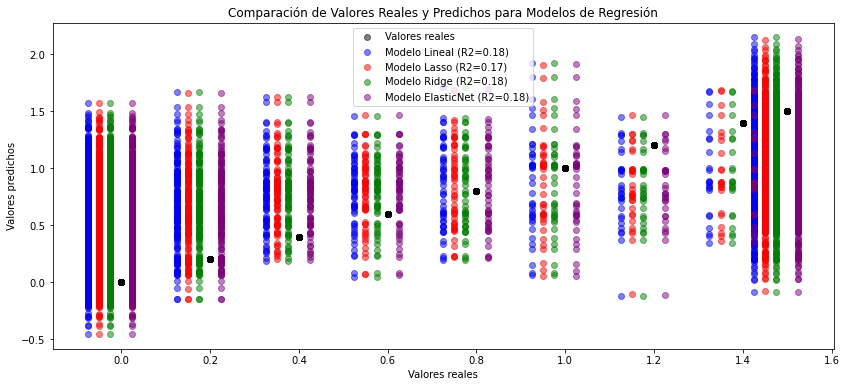

In [34]:
# Calculamos las predicciones para cada modelo
linear_pred = linear_model.predict(X_rainfall_val)
lasso_pred = lasso_grid_search.predict(X_rainfall_val)
ridge_pred = ridge_grid_search.predict(X_rainfall_val)
elasticnet_pred = elasticnet_grid_search.predict(X_rainfall_val)

# Calculamos el R2 para cada predicción
r2_linear = r2_score(y_rainfall_val, linear_pred)
r2_lasso = r2_score(y_rainfall_val, lasso_pred)
r2_ridge = r2_score(y_rainfall_val, ridge_pred)
r2_elasticnet = r2_score(y_rainfall_val, elasticnet_pred)

# Graficamos los valores reales vs predichos para cada modelo
plt.figure(figsize=(14, 6))

# Graficar valores reales y predichos de cada modelo a todos le restamos o sumamos
# un valor arbitrario para que se visualicen mejor los puntos, también en los label
# añadimos el valor de r2 respectiva para cada uno
plt.scatter(y_rainfall_val, y_rainfall_val, color='black', label='Valores reales', alpha=0.5)
plt.scatter(y_rainfall_val - 0.075, linear_pred, color='blue', label=f'Modelo Lineal (R2={r2_linear:.2f})', alpha=0.5)
plt.scatter(y_rainfall_val - 0.05, lasso_pred, color='red', label=f'Modelo Lasso (R2={r2_lasso:.2f})', alpha=0.5)
plt.scatter(y_rainfall_val - 0.025, ridge_pred, color='green', label=f'Modelo Ridge (R2={r2_ridge:.2f})', alpha=0.5)
plt.scatter(y_rainfall_val + 0.025, elasticnet_pred, color='purple', label=f'Modelo ElasticNet (R2={r2_elasticnet:.2f})', alpha=0.5)

# Activamos la leyenda y señalizamos cada ejes
plt.legend()
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')

# Le ponemos un título
plt.title('Comparación de Valores Reales y Predichos para Modelos de Regresión')

# Mostramos la gráfica
plt.show()

Este gráfico muestra por un lado los puntos reales (puntos negros), hay muchos puntos reales superpuestos, por lo que lógico pensar que hay muchos datos, por ejemplo, que son iguales a 0, 0.2, etc ya que es una variable discreta. Los demás puntos representa cada modelo lineal, los puntos azules el **Modelo Lineal** común, los rojos el regularizador **Lasso**, los verdes **Ridge** y los violetas **Elasticnet**. Todos los puntos de los modelos estan movidos dentro del eje X para mejor visualización y como podemos ver, todos los modelos predijieron en el mismo rango de valores, por ejemplo para el punto real 0 van desde -0.5 a 1.5.

#### *12.1.1.2 Interpretabilidad Local*

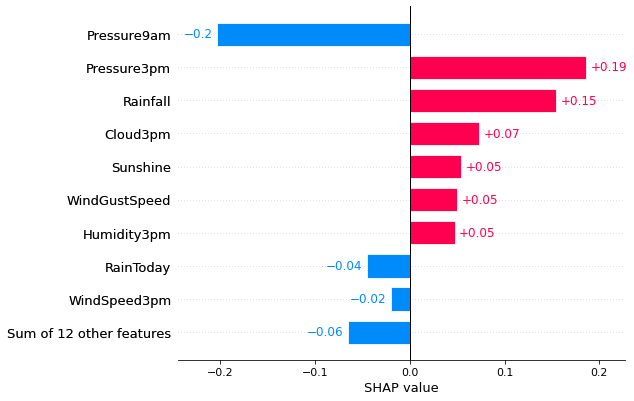

In [36]:
# Creamos un objeto explainer utilizando LinearExplainer para un modelo logístico
explainer = shap.LinearExplainer(linear_model, X_rain_train, feature_names=X_rainfall_train.columns)

# Calculamos los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_rainfall_val)

# Realizamos una predicción de probabilidad usando el modelo logístico
logistic_model.predict_proba(X_rainfall_val)[0]

# Creamos un objeto Explanation con los valores SHAP, el valor base y los nombres de las características
explanation = shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, feature_names=X_rainfall_train.columns)

# Creamos un gráfico de barras para visualizar los valores SHAP del primer ejemplo
shap.plots.bar(explanation)

La gráfica de SHAP nos muestra la contribución de cada característica para cada predicción en comparación con la predicción base. Representan cómo cada característica afecta la predicción del modelo para un ejemplo específico. En este caso, para nuestro caso podemos que en la regresión lineal las características de 'Pressure' tuvieron el mayor impacto en nuestra predicción.

#### *12.1.1.3 Interpretabilidad Global*

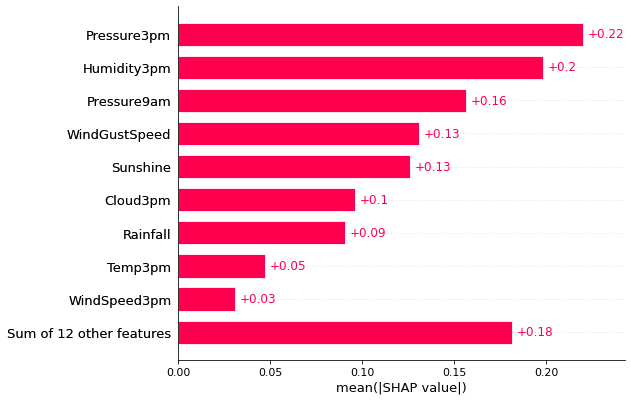

In [37]:
# Creamos un objeto Explanation utilizando los valores SHAP, el valor base, los nombres de las características y los datos de prueba
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=X_rainfall_train.columns, data=X_rainfall_val)

# Creamos un gráfico de barras para visualizar los valores SHAP para todos los ejemplos en el conjunto de prueba
shap.plots.bar(explanation)

En el caso global, se añade otra característica más como una que contribuyó mucho en la predicción que es 'Humidity3pm', es decir, la humedad. Lo que podemos dejar en claro de ambas gráficos es que los valores más relacionados con la presión atmosférica, la humedad, velocidades del viento, porcentajo de nublado o soleado, la cantidad de lluvia que cayó ese día son los valores que más impactan en nuestro modelo, mientras que valores como el lugar donde se estan observando los datos, la dirección de las velocidades del viento, si llovió o no ese día, la evaporación y demás no tiene gran impacto en nuestras predicciones tanto local como globalmente hablando.

### **12.1.2 Redes Neuronales para Regresión**

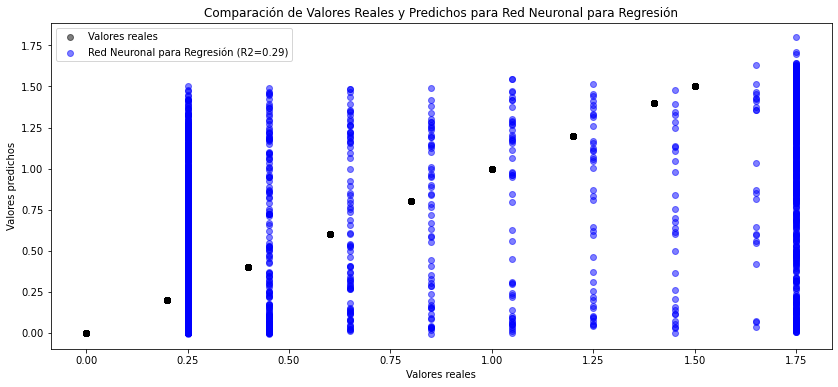

In [46]:
# Creamos una instancia de la Red Neuronal
reg_neural_network = RegressionNeuralNetworkTensorFlow(study=study_reg, lr=gs_nnr.best_params_['lr'],
                                                           batch_size=1024, epochs=100, verbose=0)

# Entrenamos el modelo
reg_neural_network.fit(X_rainfall_train, y_rainfall_train)

# Calculamos las predicciones del modelo
y_pred = reg_neural_network.predict(X_rainfall_val)

# Calculamos el R2 del modelo
r2_nnr = r2_score(y_rainfall_val, y_pred)

# Graficamos los valores reales vs predichos para cada modelo
plt.figure(figsize=(14, 6))

# Graficar valores reales y predichos del modelo
plt.scatter(y_rainfall_val, y_rainfall_val, color='black', label='Valores reales', alpha=0.5)
plt.scatter(y_rainfall_val + 0.25, y_pred, color='blue', label=f'Red Neuronal para Regresión (R2={r2_nnr:.2f})', alpha=0.5)

# Activamos la leyenda y señalizamos cada ejes
plt.legend()
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')

# Le ponemos un título
plt.title('Comparación de Valores Reales y Predichos para Red Neuronal para Regresión')

# Mostramos la gráfica
plt.show()

Este gráfico es igual al anterior, grafica los datos predichos sobre los reales, en este caso podemos ver los rangos que predijo la **Red Neuronal** cada punto con respecto a los puntos reales.

## *12.2 Clasificación*

### **12.2.1 Regresión Logística con Regularizadores (Lasso, Ridge y Elasticnet)**

#### *12.2.1.1 Evaluación Final*

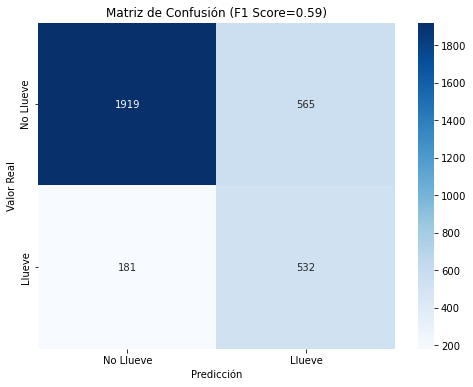

In [30]:
# Creamos una instancia del modelo de Regresión Logística
logistic_model = LogisticRegression(C=gs_reg_log.best_params_['C'], penalty=gs_reg_log.best_params_['penalty'], random_state=21)

# La entrenamos
logistic_model.fit(X_rain_train, y_rain_train)

# Calculamos las predicciones del modelo
y_pred = logistic_model.predict(X_rain_val)

# Calculamos el 'F1 Score' para solo los label 1
f1_1 = f1_score(y_rain_val, y_pred, pos_label=1)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_rain_val, y_pred)

# La graficamos
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Llueve', 'Llueve'], yticklabels=['No Llueve', 'Llueve'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title(f'Matriz de Confusión (F1 Score={f1_1:.2f})')
plt.show()

Esta matriz de confusión nos muestra la cantidad de valores que la Regresión Logística predijo, cuales predijo bien y cuales no, es decir, nos muestra las verdaderos positivos y negativos y los falsos positivos y negativos. Esto es importante ya que podemos considerar que existe un valor importante a tener en cuenta por encima de los otros, los verdaderos positivos y negativos los vamos a ignorar, ya que nos muestran las predicciones que estan correctamente predichas, nos vamos a centrar en los falsos negativos y positivos. 

Hay 181 falsos negativos, es decir, predecimos que no iba a llover y al final llovió y 565 falsos positivos, donde predijimos que llovió y no llovió. Podemos considerar que predecir que va a llover y que no llueva, dentro de todo no puede ocasionar problemas a una persona que, por ejemplo, esta esperando nuestra predicción, ese día deciría salir a la calle con un paraguas pero al final no lo usaría, sería molesto para la persona porque tiene que llevar algo adicional pero dentro de todo no paso nada. Mientrás que, del otro lado, los faltos negativos pueden llegar a ser aún más molestos, esta persona vió que nosotros predijimos que no iba a llover y cuando salio a la calle llovió, esto puede generar desde que simplemente se moje hasta que se moje mucho si esa persona esta viajando en moto, por ejemplo, estaría al exterior sin ningun tipo de traje que lo cubra ya que, según nosotros no iba a llover. A partir de esto podemos pensar que los falsos negativos son más importantes que los falsos positivos, minimizar estos datos sería lo mejor para reducir la posibilidad de predecir este tipo de escenario, en este caso ya de por sí es tipo de variable que menos hay, por lo que ya se encuentra esta minimizado.

#### *12.2.1.2 Interpretabilidad Local*

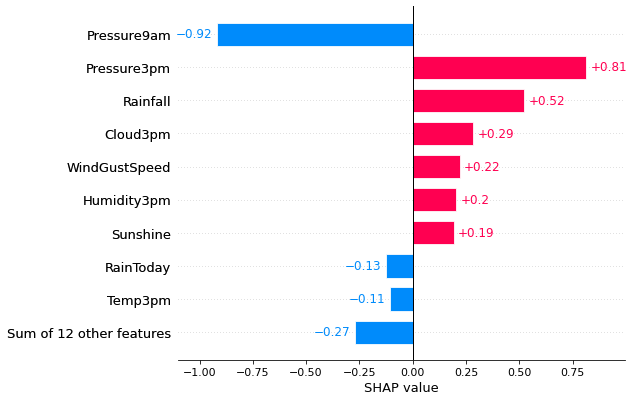

In [39]:
# Creamos un objeto explainer utilizando LinearExplainer para un modelo logístico
explainer = shap.LinearExplainer(logistic_model, X_rain_train, feature_names=X_rain_train.columns)

# Calculamos los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_rain_val)

# Realizamos una predicción de probabilidad usando el modelo logístico
logistic_model.predict_proba(X_rain_val)[0]

# Creamos un objeto Explanation con los valores SHAP, el valor base y los nombres de las características
explanation = shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, feature_names=X_rain_train.columns)

# Creamos un gráfico de barras para visualizar los valores SHAP del primer ejemplo
shap.plots.bar(explanation)

Esta gráfica de interpretabilidad o SHAP values no nos muestra una gran diferencia con respecto a la anterior, si en temas de valores, nos muestra un incremento en la contribución de ciertas variables haciendolas aún más importantes, pero se mantienen la mismas variables importantes que en la anterior gráfica dando cierta coherencia al trabajo.

#### *12.2.1.3 Interpretabilidad Global*

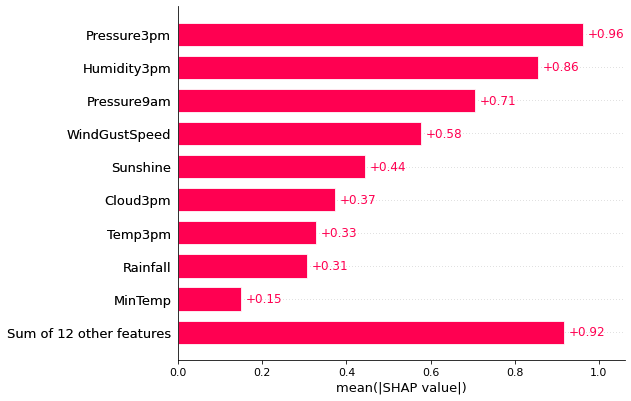

In [40]:
# Creamos un objeto Explanation utilizando los valores SHAP, el valor base, los nombres de las características y los datos de prueba
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=X_rain_train.columns, data=X_rain_val)

# Creamos un gráfico de barras para visualizar los valores SHAP para todos los ejemplos en el conjunto de prueba
shap.plots.bar(explanation)

Tanto en el apartado local como global de Regresión Logística paso lo mismo que con Regresión Lineal, las mismas variable importantes que son las que más contribuyen a la predicción. La única diferencia, como también esta dicho en la anterior gráfica local de Regresión Logística, son los valores que ahora son mucho mayor.

### **12.2.2 Redes Neuronales para Clasificación**

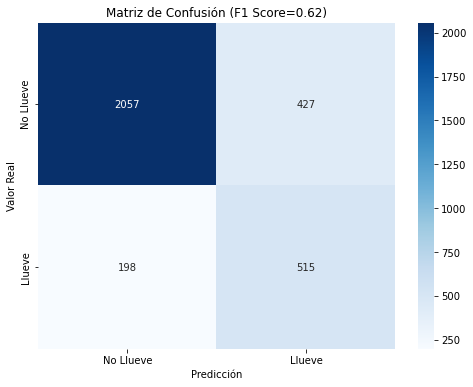

In [ ]:
# Creamos una instancia de la Red Neuronal
cla_neural_network = ClassificationNeuralNetworkTensorFlow(study=study_cla, lr=gs_nnc.best_params_['lr'],
                                                           batch_size=1024, epochs=100, verbose=0)

# Entrenamos el modelo
cla_neural_network.fit(X_rain_train, y_rain_train)

# Calculamos las predicciones del modelo
y_pred = cla_neural_network.predict(X_rain_val)

# Calculamos el 'F1 Score' para solo los label 1
f1_1 = f1_score(y_rain_val, y_pred, pos_label=1)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_rain_val, y_pred)

# La graficamos
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Llueve', 'Llueve'], yticklabels=['No Llueve', 'Llueve'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title(f'Matriz de Confusión (F1 Score={f1_1:.2f})')
plt.show()

Esta matriz de confusión, al igual que la anterior, nos muestra la cantidad de valores que la Red Neuronal para Clasificación predijo, nos muestra las verdaderos positivos y negativos y los falsos positivos y negativos. Vamos a considerar la misma importancia para los faltos negativos, en este caso hay 198, por lo que sigue siendo la clase minoritaria mantiniendo esa imporantancia de minimizar este tipo de situaciones.

# **13. Elección del modelo para cada problema**
---

La elección de los modelos que vamos a llevar a la puesta en producción se va a regir por un único parámetro: **su métrica de evaluación**. También vamos a mostrar, en una gráfica, el tiempo que le llevo a cada modelo conseguir cada métrica, pero no vamos a considerar el tiempo como parámetro de elección por el simple hecho de que ya esta entrenado el modelo, y si el modelo, aunque tarde muchisimo más en entrenarse, si podemos elegirlo a cambio de mejorar un poco o mucho la métrica, lo vamos a hacer, pero aún así es interesante ver ambas graficadas para ver la diferencia.

Algo a aclarar también es la elección de las métricas, en el caso de **R2** es porque es la métrica que mejor representa que tan certero es nuestra predicción en la **Regresión**, pero del otro lado, de **Clasificación** se eligió **F1-Score label=1** porque el **label=1** representa la clase minoritaria, en el dataset se tiene un desbalanceo de datos que, a pesar de que se puede y se arregló, en los datos de test sigue existiendo y se sigue dando cierto desbalanceo, por lo que se busco máximar esa métrica en particular.

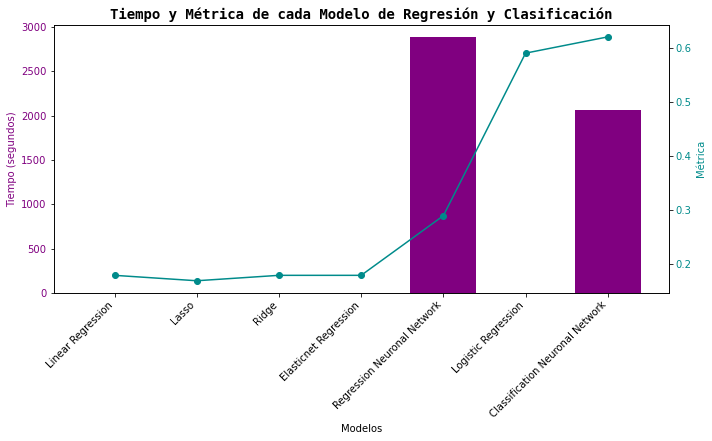

In [47]:
# Time se mide en segundos y las métricas son solo los valores, para
# el caso de regresión es R2 y para el caso de clasificación F1-Score
metrics_time = {
    'Linear Regression': {
        'Time': 2.5,
        'Metric': 0.18
    },
    'Lasso': {
        'Time': 2.5,
        'Metric': 0.17
    },
    'Ridge': {
        'Time': 2.5,
        'Metric': 0.18
    },
    'Elasticnet Regression': {
        'Time': 2.5,
        'Metric': 0.18
    },
    'Regression Neuronal Network': {
        'Time': 2881,
        'Metric': 0.29
    },
    'Logistic Regression': {
        'Time': 2,
        'Metric': 0.59
    },
    'Classification Neuronal Network': {
        'Time': 2063,
        'Metric': 0.62
    },
}

# Convertimos el diccionario a un DataFrame para facilitar el manejo de datos
df = pd.DataFrame(metrics_time).transpose()

# Creamos un gráfico de barras para los tiempos
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Modelos')
ax1.set_ylabel('Tiempo (segundos)', color='purple')
ax1.bar(df.index, df['Time'], color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Rotamos las etiquetas del eje X para mejorar la visibilidad del texto
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Creamos un segundo eje Y para la métrica (línea)
ax2 = ax1.twinx()
ax2.set_ylabel('Métrica', color='darkcyan')
ax2.plot(df.index, df['Metric'], color='darkcyan', marker='o')
ax2.tick_params(axis='y', labelcolor='darkcyan')

# Ajustamos el diseño y mostramos el gráfico
fig.tight_layout()
plt.title('Tiempo y Métrica de cada Modelo de Regresión y Clasificación', fontsize=14, fontweight='bold', fontfamily='monospace')
plt.show()

Como podemos ver, el modelo que más tardo en entrenarse fue la **Red Neuronal de Regresión**, mientras que ambas redes fueron las que más tardaron en su propio problema, a su vez, son las que obtuvieron las mejores métricas.

En el caso de **Regresión**, la *Regresión Lineal*, *Lasso*, *Ridge* y *Elasticnet* (Regularizadores) obtuvieron prácticamente la misma métrica (0.18) en el mismo tiempo, mientrás que la **Red Neuronal** la superó por bastante (0.27), un **50%** más que las demás. Del otro lado, **Clasificicación**, tenemos la *Regresión Logística* con una métrica (0.59) ligeramente inferior a la **Red Neuronal** (0.62), aún así eso significa un aumento del **≈5%**, lo cual es una ligera diferencia (10 veces menos que en *Regresión*) pero sigue sigue superior.

Por lo que esto deja a ambas **Redes Neuronales** quedaron por encima de sus competidores, aunque la *Regresión Logística* estuvo muy cerca de la red, fue superada y por el lado de las regresiones, directamente estan demasiado lejos de la red.

# **14. Pipelines**
---

## *14.1 Creación de los pipelines*

In [ ]:
# Filtrar columnas por tipo
numerical_feature, categorical_feature, discrete_feature, continuous_feature = filter_columns_types(X_pipe)

''' Creamos clases personalizadas para hacer cada paso que haciamos en el preprocesamiento
de los datos con nuestros datos iniciales. Esto es porque los pipelines se comportan mejor con
clase y funciones específicas que le permiten fitear y transformar los datos según un determinado método'''

# Clase de Outliers (Datos Atípicos)
class OutliersImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X = pd.DataFrame(X, columns=numerical_feature + categorical_feature)
        self.bridge_dict = {}

        for feature in continuous_feature:
            IQR = X[feature].quantile(0.75) - X[feature].quantile(0.25)
            lower_bridge = X[feature].quantile(0.25) - (IQR * 1.5)
            upper_bridge = X[feature].quantile(0.75) + (IQR * 1.5)

            self.bridge_dict[feature] = [lower_bridge, upper_bridge]

        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=numerical_feature + categorical_feature)

        for feature in continuous_feature:
            lower_bridge, upper_bridge = self.bridge_dict[feature]

            X.loc[X[feature] >= upper_bridge, feature] = upper_bridge
            X.loc[X[feature] <= lower_bridge, feature] = lower_bridge
        return X

# Clase de Encoder (Codificación)
class CustomEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Convertimos las columnas categóricas restantes a numéricos ('Date' y 'Location' no tienen valores faltantes y en 'RainToday' y 'RainTomorrow' vamos a usar otro método)
        windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10, 'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
        winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10, 'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
        winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10, 'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
        location = { 'Sydney': 1, 'SydneyAirport': 2, 'MelbourneAirport': 3, 'Melbourne': 4, 'Canberra': 5}

        # Lista de columnas categóricas que necesitan ser mapeadas
        categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location']

        # Definimos las funciones de mapeo para cada columna
        mapping_functions = {
            'WindGustDir': windgustdir,
            'WindDir9am': winddir9am,
            'WindDir3pm': winddir3pm,
            'Location': location
        }

        # Mapeamos las columnas categóricas
        for column in categorical_columns: X[column] = X[column].map(mapping_functions[column])

        # Reemplazamos los 'Yes' por 1 y 'No' por 0 en la columna de 'RainToday'
        X['RainToday'] = pd.get_dummies(X['RainToday'], drop_first=True)
        return X

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

# Clase de Estandarización
class CustomStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self, discarded_columns=categorical_feature):
        self.scaler = StandardScaler()
        self.discarded_columns = discarded_columns

    def fit(self, X, y=None):
        X = pd.DataFrame(X, columns=numerical_feature + categorical_feature)

        self.numeric_data = X.drop(self.discarded_columns, axis=1)
        self.scaler.fit(self.numeric_data)
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=numerical_feature + categorical_feature)

        standarized_data = self.scaler.transform(X.drop(self.discarded_columns, axis=1))
        standarized_df = pd.DataFrame(standarized_data, columns=self.numeric_data.columns)

        missing_columns = X[self.discarded_columns].reset_index(drop=True)
        result = pd.concat([missing_columns, standarized_df], axis=1)

        return result

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

# Clase para no fitear el modelo y solo predecir con el
class ModelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

    def predict(self, X):
        return self.model.predict(X)

'''
Creamos un 'ColumnTransformer' para aplicar transformaciones específicas a diferentes conjuntos de columnas
Esto es porque en nuestro dataset inicial, las variables numéricas las imputabamos por la mediana y las
categóricas por la moda, esta explicado más arriba el por qué.
'''
imputation = ColumnTransformer(
    transformers = [
        ('numerical_imputer', SimpleImputer(strategy='median'), continuous_feature),
        ('discretes_imputer', SimpleImputer(strategy='most_frequent'), discrete_feature),
        ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_feature),
    ],
    remainder='passthrough'  # Permite mantener las columnas no afectadas por las transformaciones
)

pipeline_cla = Pipeline([
    ('imputation', imputation),
    ('outliers_imputer', OutliersImputer()),
    ('scaler', CustomStandardScaler()),
    ('encoder', CustomEncoder()),
    ('model', ModelTransformer(cla_neural_network)),
])

pipeline_reg = Pipeline([
    ('imputation', imputation),
    ('outliers_imputer', OutliersImputer()),
    ('scaler', CustomStandardScaler()),
    ('encoder', CustomEncoder()),
    ('model', ModelTransformer(reg_neural_network)),
])

# Entrenamos el pipeline con los datos de entrenamiento que separamos con antelación
pipeline_cla.fit(X_pipe)
pipeline_reg.fit(X_pipe)

Pipeline(steps=[('imputation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('discretes_imputer',
                                                  SimpleIm...
                   

## *14.2 Guardar los pipelines en archivos para la puesta en producción*

In [ ]:
''' Guardamos los pipelines y el csv '''
# Pipelines
joblib.dump(pipeline_reg, 'archivos/pipeline_reg.joblib')
joblib.dump(pipeline_cla, 'archivos/pipeline_cla.joblib')

# CSV
X_pipe.to_csv('archivos/data_pipe.csv', index=False)

# **15. Conclusiones**
---

En este trabajo práctico se busco poder **predecir** si va a llover o no el día subsiguiente al que se este analizando, todo esto con datos procedentes de *Australia* y, por consecuencia, solo pudieron predecir lluvia en el propio país.

Se hicieron **6 modelos, 4 de regresión y 2 de clasificación**, aunque se podrían considerar 3 de regresión como uno solo (regresión lineal, lasso, ridge y elasticnet), por lo que vamos a decir que hicimos **4 modelos, 2 de regresión y 2 de clasificación**. Los de regresión son: uno sencillo *(Regresión Lineal Múltiple)* y otro complejo *(Red Neuronal)*, en el caso de clasificación sería lo mismo, uno sencillo *(Regresión Logística)* y otro complejo *(Red Neuronal)*. Lo más importante a aclarar que, aunque las redes sean más complejas, esto no significa que nos van a dar métricas muchisimo mejores que los modelos más sencillos y esto se pudo ver a lo largo del trabajo.

Luego de pasar por la **creación, entrenamiento y validación** se hizo la **puesta en producción**, buscando que se puedan directamente predecir, de una forma sencilla, valores que nosotros o cualquier persona elija utilizando los modelos elegidos *(ambas redes)*.

Lo que puedo decir como final es que se llevo a cabo el trabajo con un objetivo y este se cumplió, con mayor o menor probabilidad de acierto, mayor o peor métrica, se cumplió, haciendo que podemos ser capaces de, al menos, predecir un día si va a llover.